<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students: 
<br>
Christopher Lin (49213176)  <br>
Crystal Fan (55668297) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>

### Prep

In [1]:
# install.packages('fpp2')
# install.packages('corrplot')

In [2]:
library(fpp2) # load the Forecasting: Principles and Practice package, as well as all its dependencies
library("corrplot")
# library("PerformanceAnalytics")
library("RColorBrewer")
library("dplyr")
library("tidyr")
library("tidyverse")
library("car")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.6     v fma       2.4  
v forecast  8.19      v expsmooth 2.3  



corrplot 0.92 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.2
v purrr   0.3.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:purrr':

    some


The following object is masked from 'package:dplyr':

    recode





### Import the data

In [3]:
YVR_rawdata <- read.csv(file = 'Energy use at YVR.csv')

In [4]:
head(YVR_rawdata)

month  energy mean.temp total.area total.passengers domestic.passengers
1 Jan-97 5958    3.9      202966     1068.36          573.84             
2 Feb-97 5859    5.0      202966     1040.30          570.36             
3 Mar-97 5230    6.3      202966     1195.47          632.68             
4 Apr-97 5654    9.1      202966     1086.42          599.11             
5 May-97 5618   14.0      202966     1244.52          673.70             
6 Jun-97 5963   15.6      202966     1352.89          729.84             
  US.passengers international.passengers
1 263.13        231.38                  
2 267.39        202.56                  
3 319.09        243.71                  
4 265.37        221.94                  
5 307.55        263.27                  
6 333.89        289.16

In [5]:
ts_YVRdata <- ts(data = YVR_rawdata[,2], start = c(1997,01,01) , end = c(2010,12,31), frequency = 12)

In [6]:
ts_YVRdata

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


### Time plot

In [7]:
options(repr.plot.width=12, repr.plot.height=8)

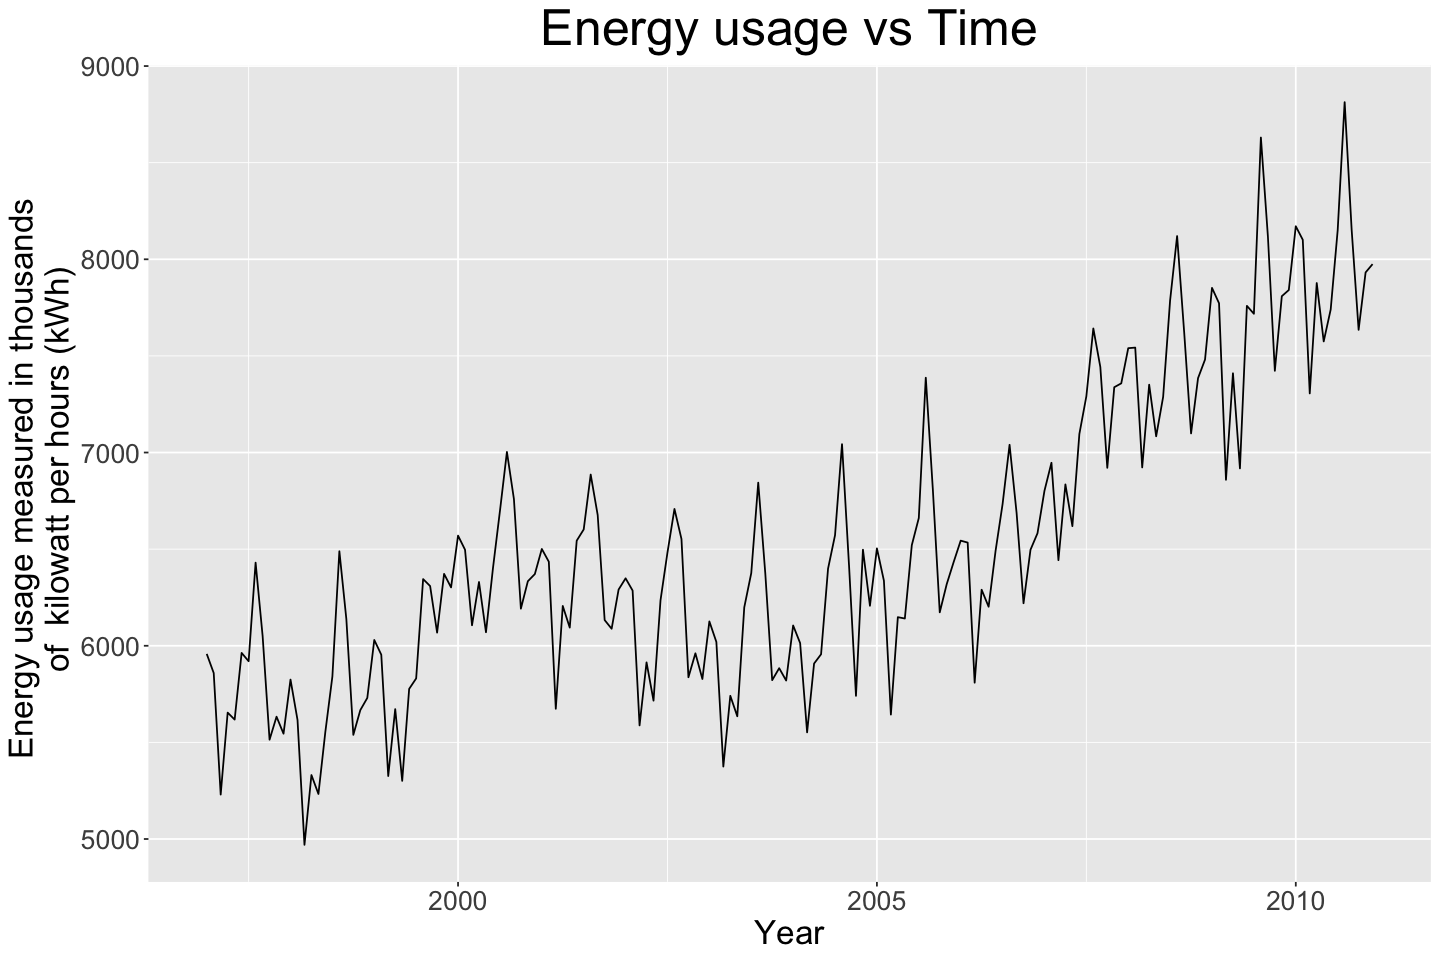

In [8]:
autoplot(ts_YVRdata, 
         xlab = "Year",
         ylab="Energy usage measured in thousands \n of  kilowatt per hours (kWh)") +
theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5, size=30)) +
ggtitle("Energy usage vs Time") 


### Box-Cox transformation

[1] 0.6931483

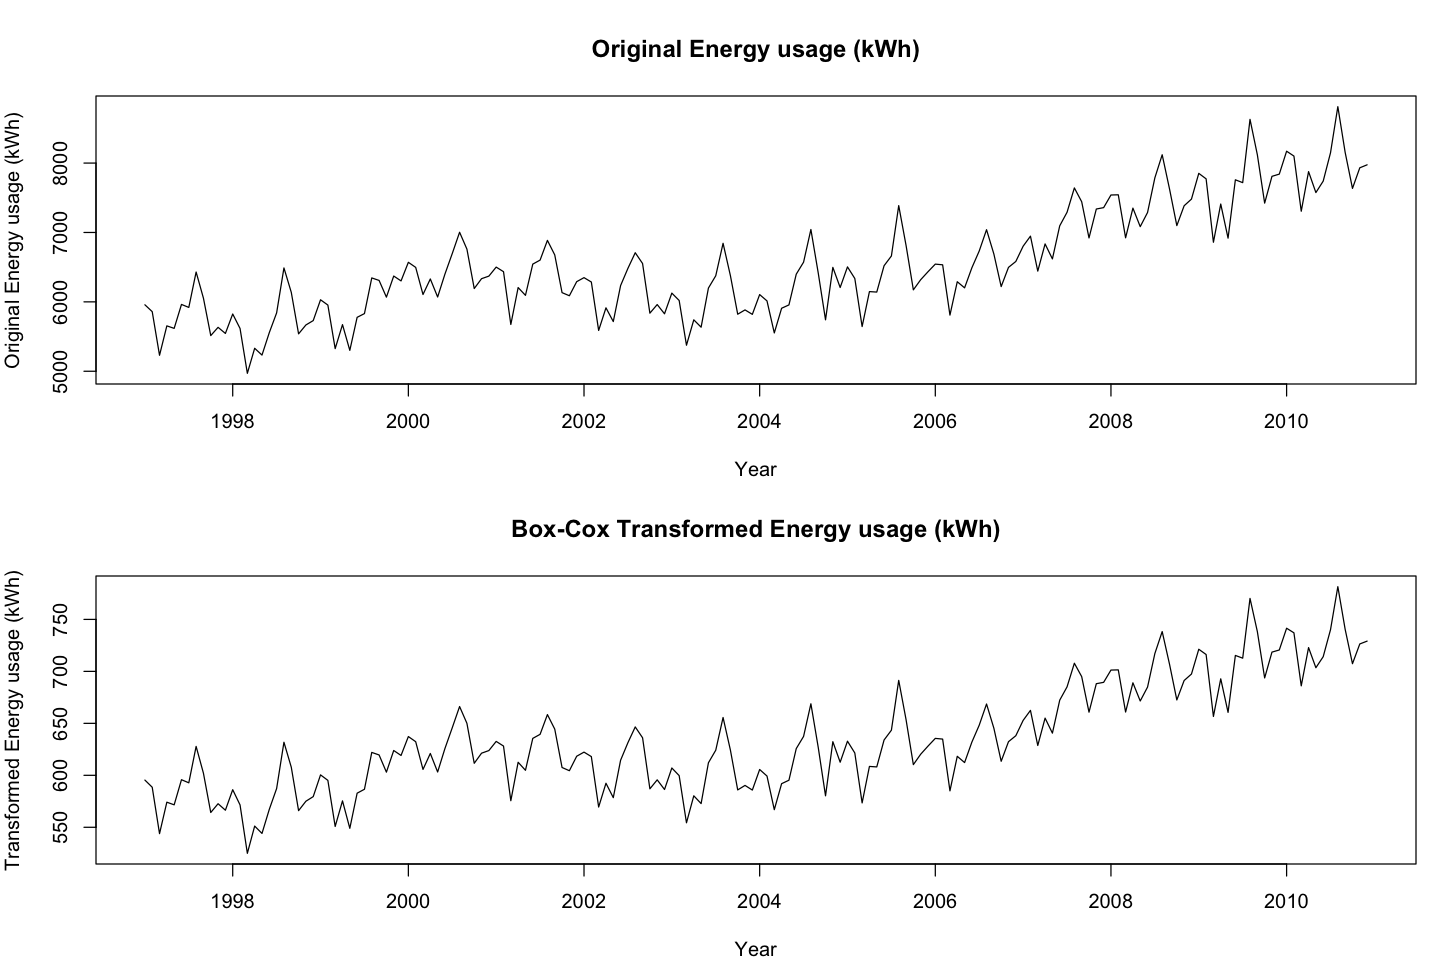

In [9]:
lambda <- BoxCox.lambda(ts_YVRdata)
lambda
par(mfrow=c(2,1), mar=c(4,4,4,1))
plot(ts_YVRdata, ylab="Original Energy usage (kWh)", xlab="Year", main="Original Energy usage (kWh)")
plot(BoxCox(ts_YVRdata,lambda), ylab="Transformed Energy usage (kWh)",
     xlab="Year", main="Box-Cox Transformed Energy usage (kWh)")


### Calendar adjustment for number of days in each month

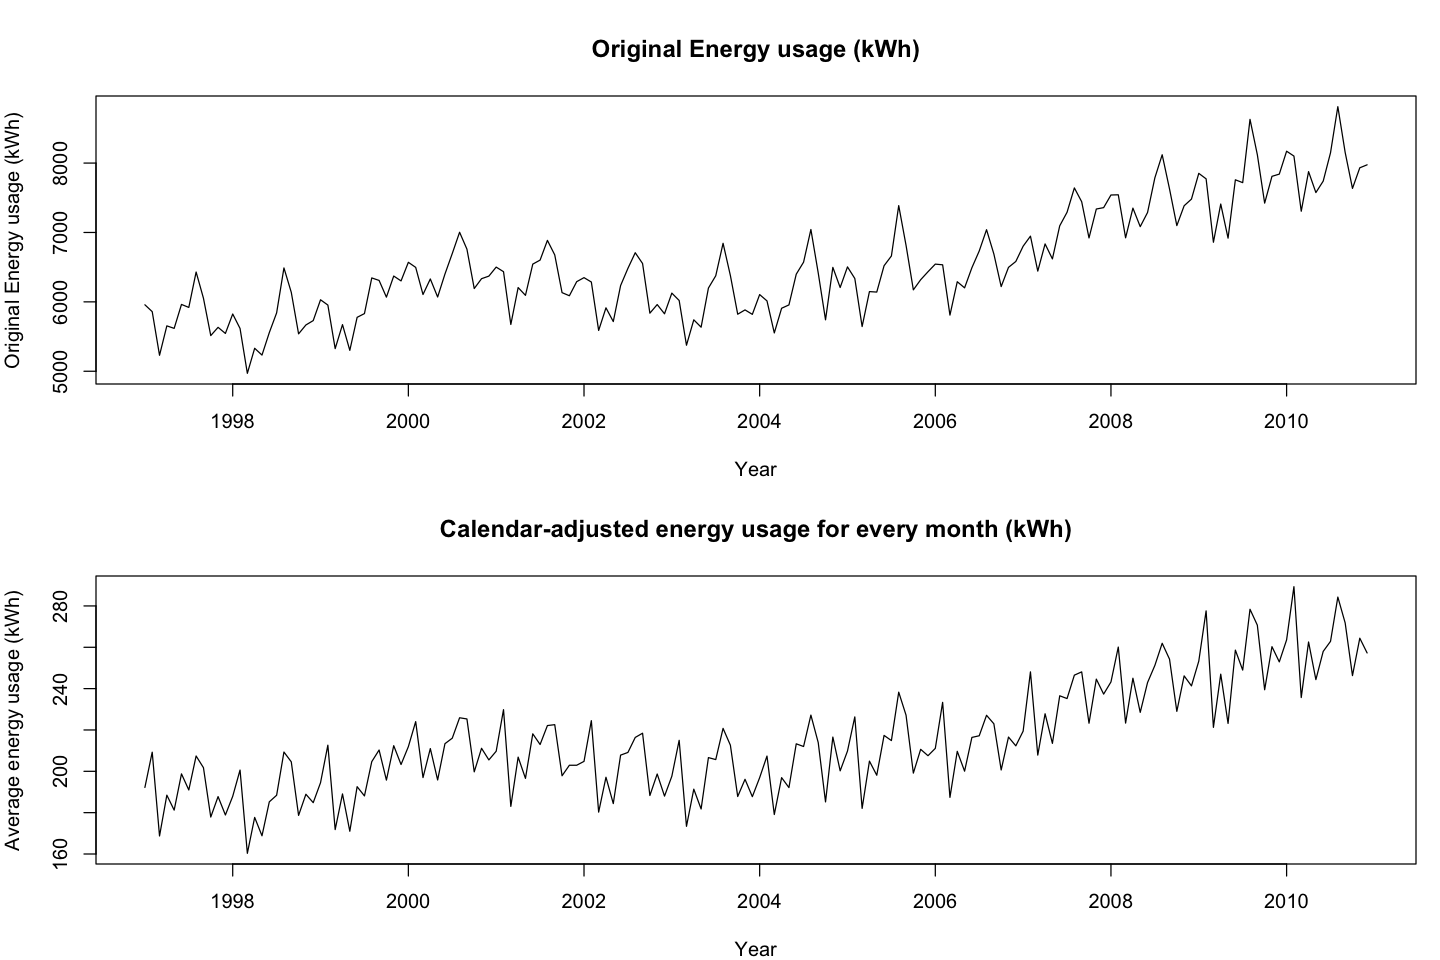

In [10]:
par(mfrow=c(2,1), mar=c(4,4,4,1))
plot(ts_YVRdata, ylab="Original Energy usage (kWh)", xlab="Year", main="Original Energy usage (kWh)")
plot(ts_YVRdata/monthdays(ts_YVRdata), ylab="Average energy usage (kWh)",
     xlab="Year", main="Calendar-adjusted energy usage for every month (kWh)")
# maybe use "Calendar-adjusted Energy Usage (kWh)" as title?

### Divide the data into the training set and the test set

In [11]:
YVRdata_train <- window(ts_YVRdata,start=c(1997,1),end=c(2007,12))
YVRdata_test <- window(ts_YVRdata,start=2008)
# plot(YVRdata_train)

In [12]:
YVRdata_train_adj <- YVRdata_train/monthdays(YVRdata_train)
YVRdata_test_adj <- YVRdata_test/monthdays(YVRdata_test)
# plot(YVRdata_train_adj)

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective and purpose of the analysis, background information, brief description of the approach that is being taken in the analysis. If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

The primary for the project is to have a forecast model to predict monthly energy usage for Vancouver International Airport (YVR). With an accurate forecast of energy usage, the YVR representatives can reach a more favourable deal with energy supplier for a better budget planning. 

We received 14 years monthly data (1997-2010), including energy usage, date, and other related variables. After transformation check and calendar adjustment check, we investigated seasonality and trend in data. By checking the other variables in data, we found out the area of YVR impacts trend of energy usage while the number of total passengers and temperature related to seasonality in data. 

There are three types of models are tried out in this project: basic forecasting methods, exponential smoothing model (EST), and ARIMA model. We selected the representative models with lowest MSE within each type of model. The EST (MAA) is our final recommendation based on the model accuracy on test data and reasonability of visualized forecasts

There are some limitations in our analysis and final model. Our selected model performs its best within ten years. If longer forecast period is required, we would consider adding damped adjustment on current models. The ETS also is unable to catch some unusual observations, so we used ARIMA to assist with validating the forecast. To address potential multiple seasonality in data, we propose to conduct an explanatory model to ease the limitation in ETS on single and fixed seasonality assumption.


----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

From the plot 1 (YVR's Energy usage from 1997 to 2010), there is a seasonality element with trend and noises. We use slt decomposition method to check the three elements separately. By checking the decomposition plot (plot 2. Decomposition by slt), we can see that there are 14 peaks and valleys in 14 years, indicating annual frequency. The trend is fluctuated, and we will analyse further in the later section.

For the seasonality component, from the plot 3 (Seasonality pattern with trend and remainders for energy usage), we can see that usage peak happens in August and valley is in March. By removing the trend and remainder terms (Plot 4. Seasonality pattern without trend and remainders for energy usage), the conclusion for peak and valley keeps the same. Remainder graph looks like a white noise process.

For the trend and cycle analysis, we think there is no cycle but a clear trend in data. We let stl decomposition to select optimal smoothing degree and the output is in the plot 5 (Trend in electricity usage in YVR). There is an increasing trend starting in 1998 and the trend begins to stabilize with small fluctuation between year 2000 and 2007.  Starting from 2007, the usage has a rising trend till the last year of observation 2010.

When we zoom in to the remainder portion, there are two negative outliers happen in end of year 1999 and 2009. Even with outliers, the remainders approximately and evenly spread around 0.

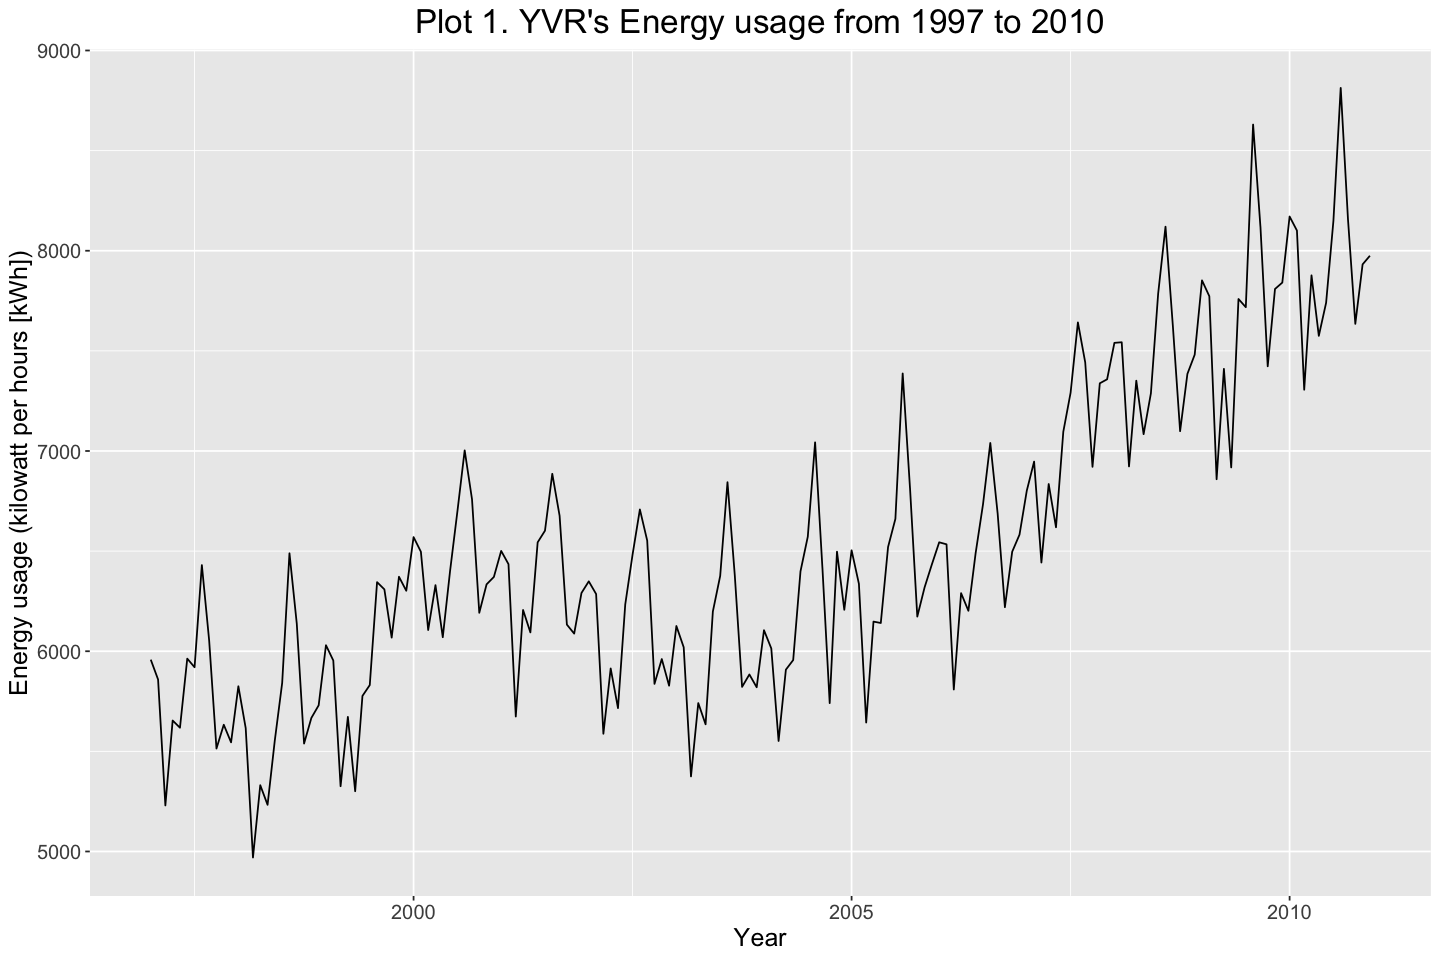

In [13]:
autoplot(ts_YVRdata, 
         xlab = "Year",
         ylab="Energy usage (kilowatt per hours [kWh])") +
theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size=20)) +
ggtitle("Plot 1. YVR's Energy usage from 1997 to 2010") 

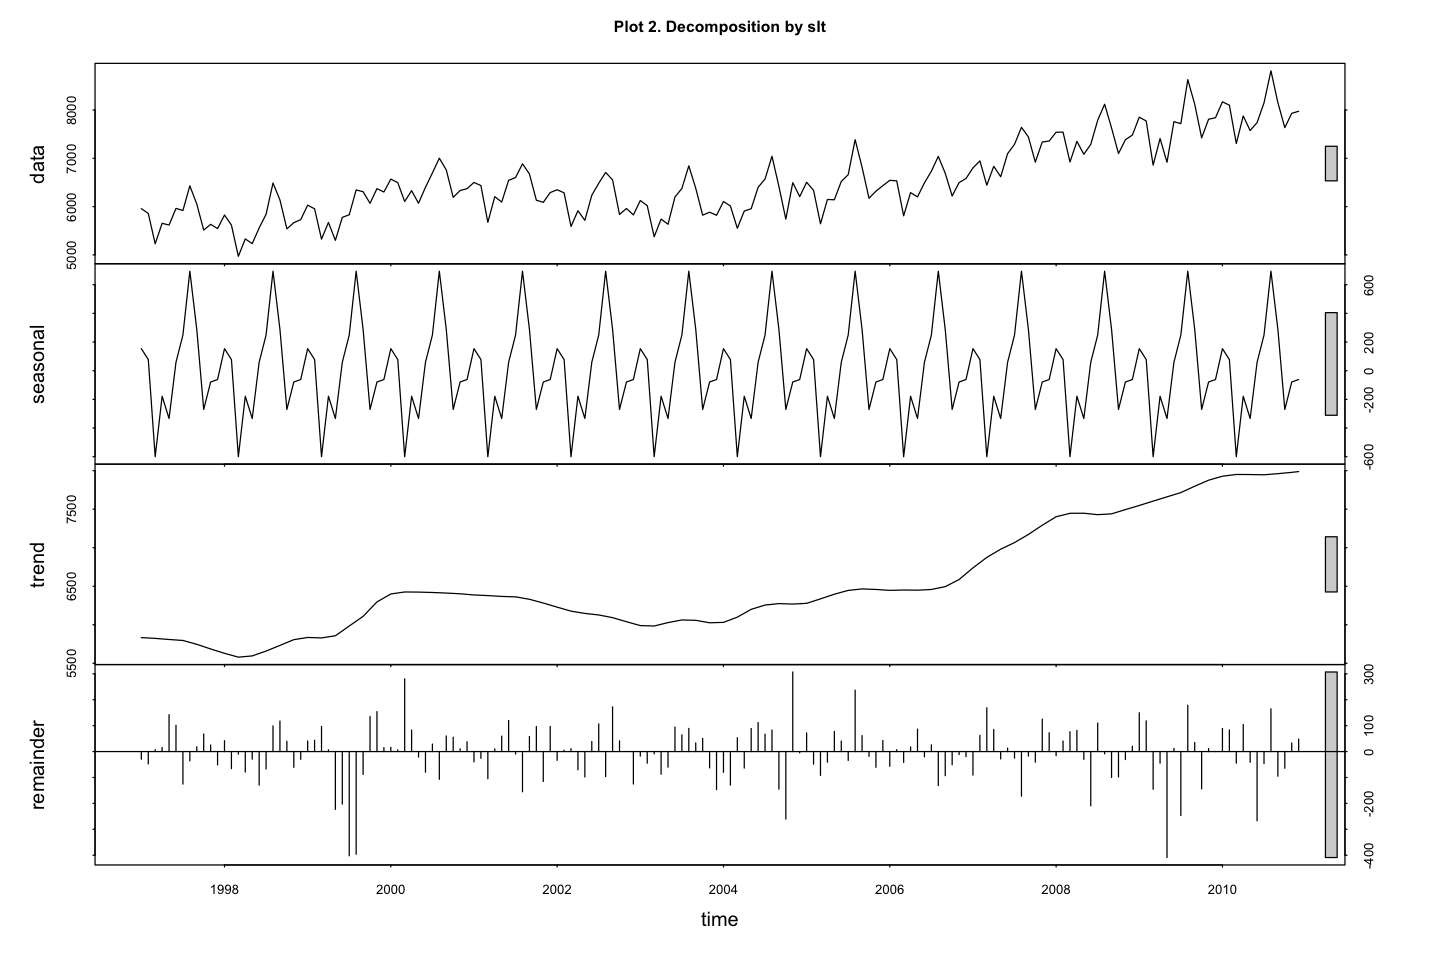

In [14]:
fit_0 <- stl(ts_YVRdata, t.window=13, s.window="periodic", robust=TRUE)
plot(fit_0, main = "Plot 2. Decomposition by slt", cex.main=3)
#Additive decomposition only since there is no seasonal variation 

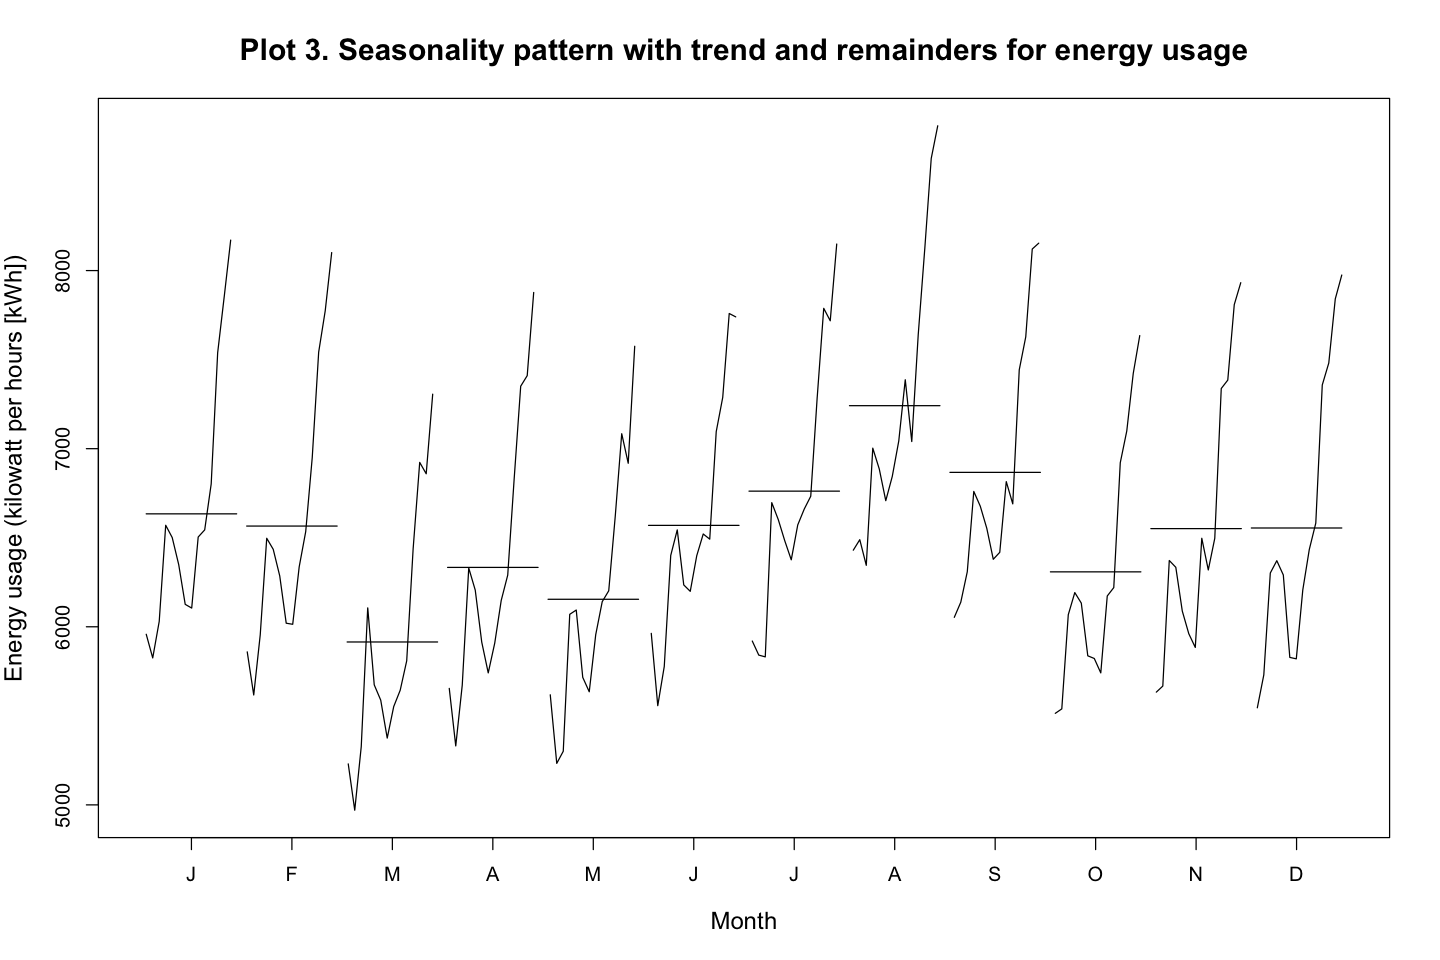

In [15]:
monthplot(ts_YVRdata, main = "Plot 3. Seasonality pattern with trend and remainders for energy usage", 
          ylab="Energy usage (kilowatt per hours [kWh])",
         xlab="Month",cex.main=1.5, cex.lab=1.2)
# from the plot below, we can see the peak happens in August and valley happens in March 

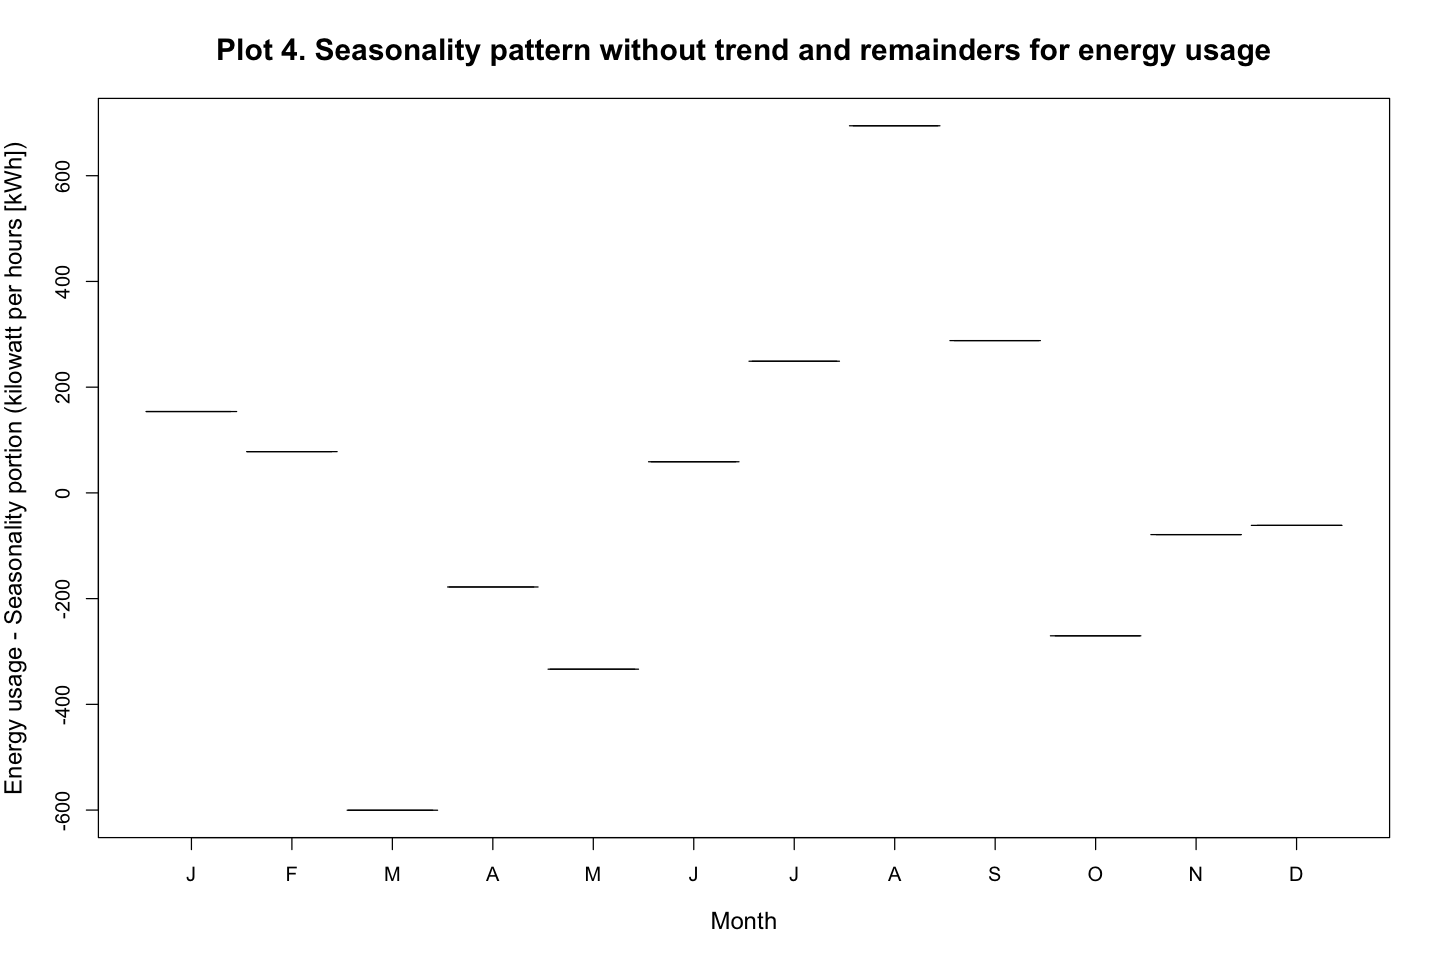

In [16]:
# plot with seasonal components only 
# without the trend and remainder, the seasonal plot provides the same conclusion
monthplot(seasonal(fit_0),main = "Plot 4. Seasonality pattern without trend and remainders for energy usage", 
          ylab="Energy usage - Seasonality portion (kilowatt per hours [kWh])",
         xlab="Month",cex.main=1.5, cex.lab=1.2)

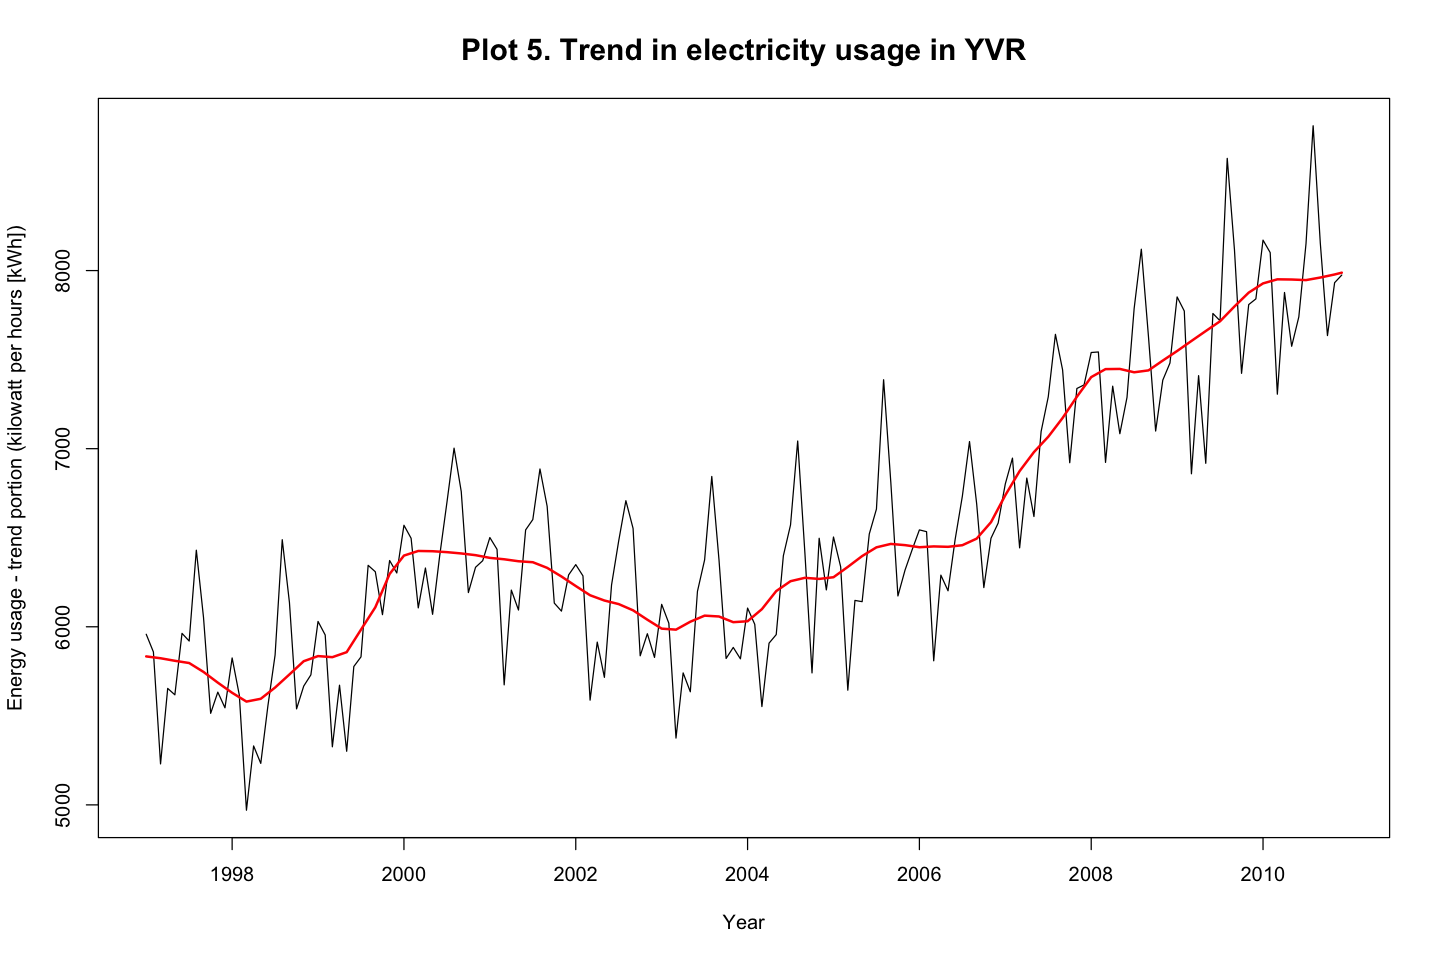

In [17]:
# Looking at the trend component (moving average at 12*2)
# Alternative code:
#trend_ele = ma(ts_YVRdata, order = 12, centre = TRUE);plot(ts_YVRdata);lines(trend_ele, col="red")

plot(ts_YVRdata, col="black", main="Plot 5. Trend in electricity usage in YVR", 
     ylab="Energy usage - trend portion (kilowatt per hours [kWh])", xlab="Year",cex.main=1.5)
lines(fit_0$time.series[,2],col="red",ylab="Trend",lwd="2") # Graph the trend-cycle

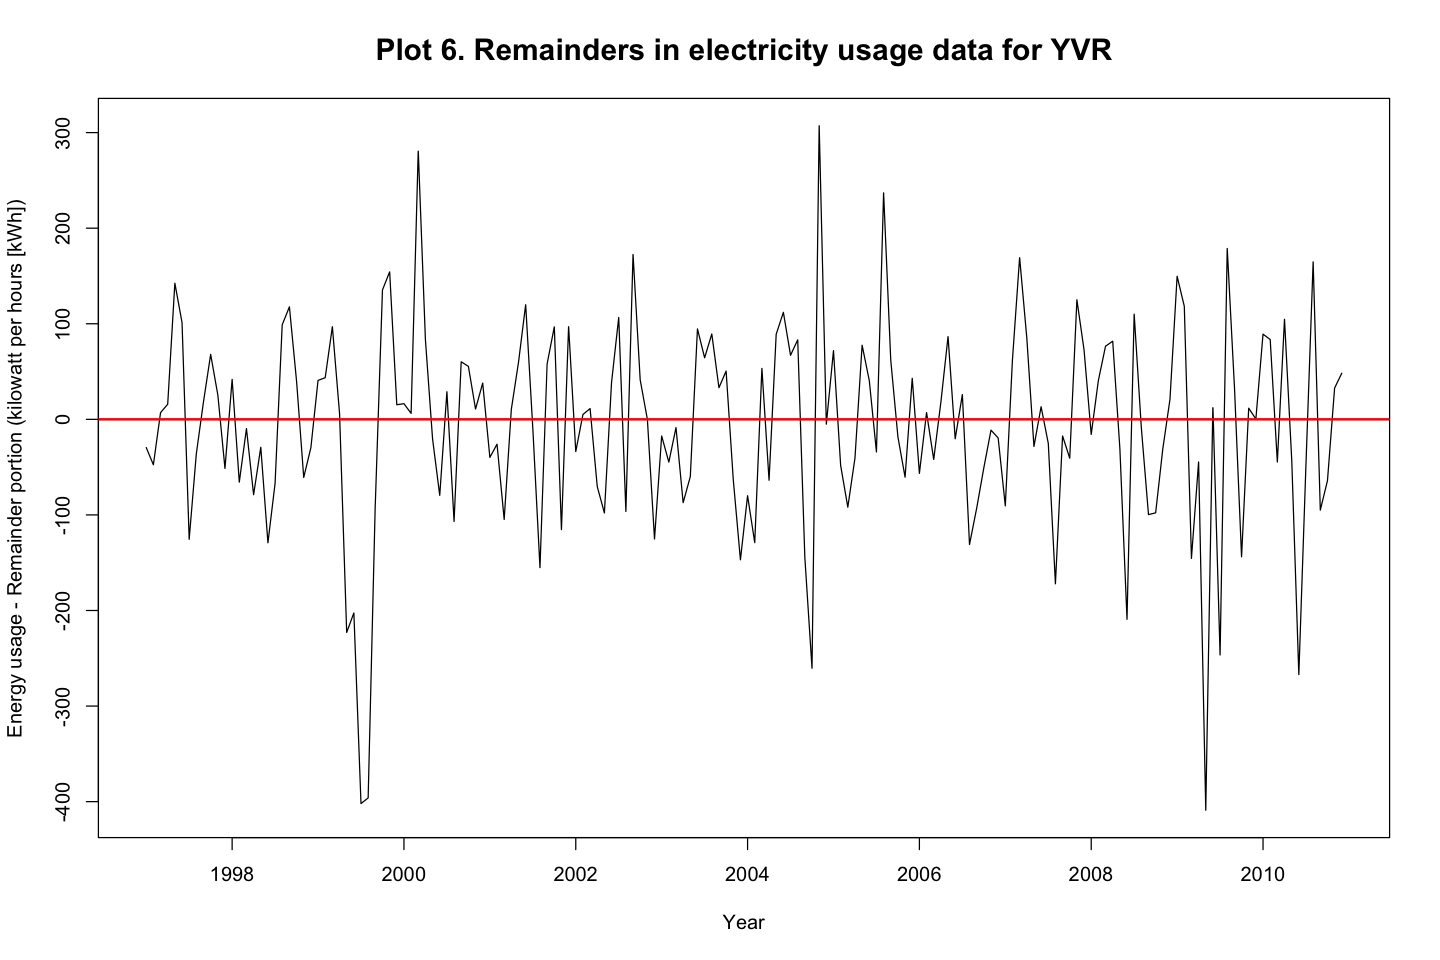

In [18]:
# plot for remainders in data
plot(remainder(fit_0),main = "Plot 6. Remainders in electricity usage data for YVR", 
          ylab="Energy usage - Remainder portion (kilowatt per hours [kWh])",
         xlab="Year",cex.main=1.5, cex.lab=1.2)
abline(h=0,col="red",lwd="2")

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

By checking the correlation between energy usage and other factors and the correlations among other factors (The correlation graph), we can see that energy usage has a significant positive correlation with total area, making sense since larger area requires more energy to provide heat/cold and lights. There are moderate correlations between energy usage and number of international/domestic/total passengers. 

Among international, domestic, and total number of passengers, there are strong positive correlations. Therefore, we can use the connection between total number of passengers and energy usage for next analysis.

In the trend of YVR’s area (plot 8), and we can see there are two significant expansions in year 1999 and end of year 2016, approximately matching the two turning point in energy usage trend (end of 1998 and beginning of 2007). The shapes of two trend alike each other. There are two stabilized periods: one is before 1999 and the other is between 2000 and 2007. Other years or period, there are constantly increasing trend in both YVR’s area and energy usage. Therefore, considering strong positive correlation between these two, we can conclude that the trend in energy usage is mainly caused by YVR’s area. 

In terms of seasonality of energy usage, we decompose the total number of passengers (plot 9) and analyze its seasonality portion (plot 11). By comparing the seasonality patterns for energy usage (plot 10) and number of total passengers, we can see there is consistency from May to October. Both two metrics start increasing in May and reach the peak in August, then fall back in October. 

Therefore, the total number of travellers between May and October, depending on the natural of weathers, determining the seasonality of energy usage in YVR. During winter period between November to February with cold weather (plot 12), even with fewer passengers, YVR still needs to consumer significant amount of energy for the heat. For the valley in the March in energy usage’s seasonality, it could be explained as the temperature starts going up and no heats or cold is required during March.

No historical events or data could explain the two outliers in remainder terms for energy usage. Therefore, we think it is due to randomness.


In [19]:
# check what other variables 
reg_YVR <- YVR_rawdata[,-1]
head(reg_YVR)

energy mean.temp total.area total.passengers domestic.passengers
1 5958    3.9      202966     1068.36          573.84             
2 5859    5.0      202966     1040.30          570.36             
3 5230    6.3      202966     1195.47          632.68             
4 5654    9.1      202966     1086.42          599.11             
5 5618   14.0      202966     1244.52          673.70             
6 5963   15.6      202966     1352.89          729.84             
  US.passengers international.passengers
1 263.13        231.38                  
2 267.39        202.56                  
3 319.09        243.71                  
4 265.37        221.94                  
5 307.55        263.27                  
6 333.89        289.16

                            energy    mean.temp   total.area total.passengers
energy                   1.0000000  0.175294319  0.863046265        0.4489983
mean.temp                0.1752943  1.000000000 -0.003013187        0.7550946
total.area               0.8630463 -0.003013187  1.000000000        0.2705003
total.passengers         0.4489983  0.755094564  0.270500316        1.0000000
domestic.passengers      0.4751793  0.735008426  0.307661294        0.9662662
US.passengers            0.2934147  0.714776145  0.101232147        0.9393991
international.passengers 0.4967922  0.697886440  0.347078286        0.9443186
                         domestic.passengers US.passengers
energy                             0.4751793     0.2934147
mean.temp                          0.7350084     0.7147761
total.area                         0.3076613     0.1012321
total.passengers                   0.9662662     0.9393991
domestic.passengers                1.0000000     0.8474421
US.passengers         

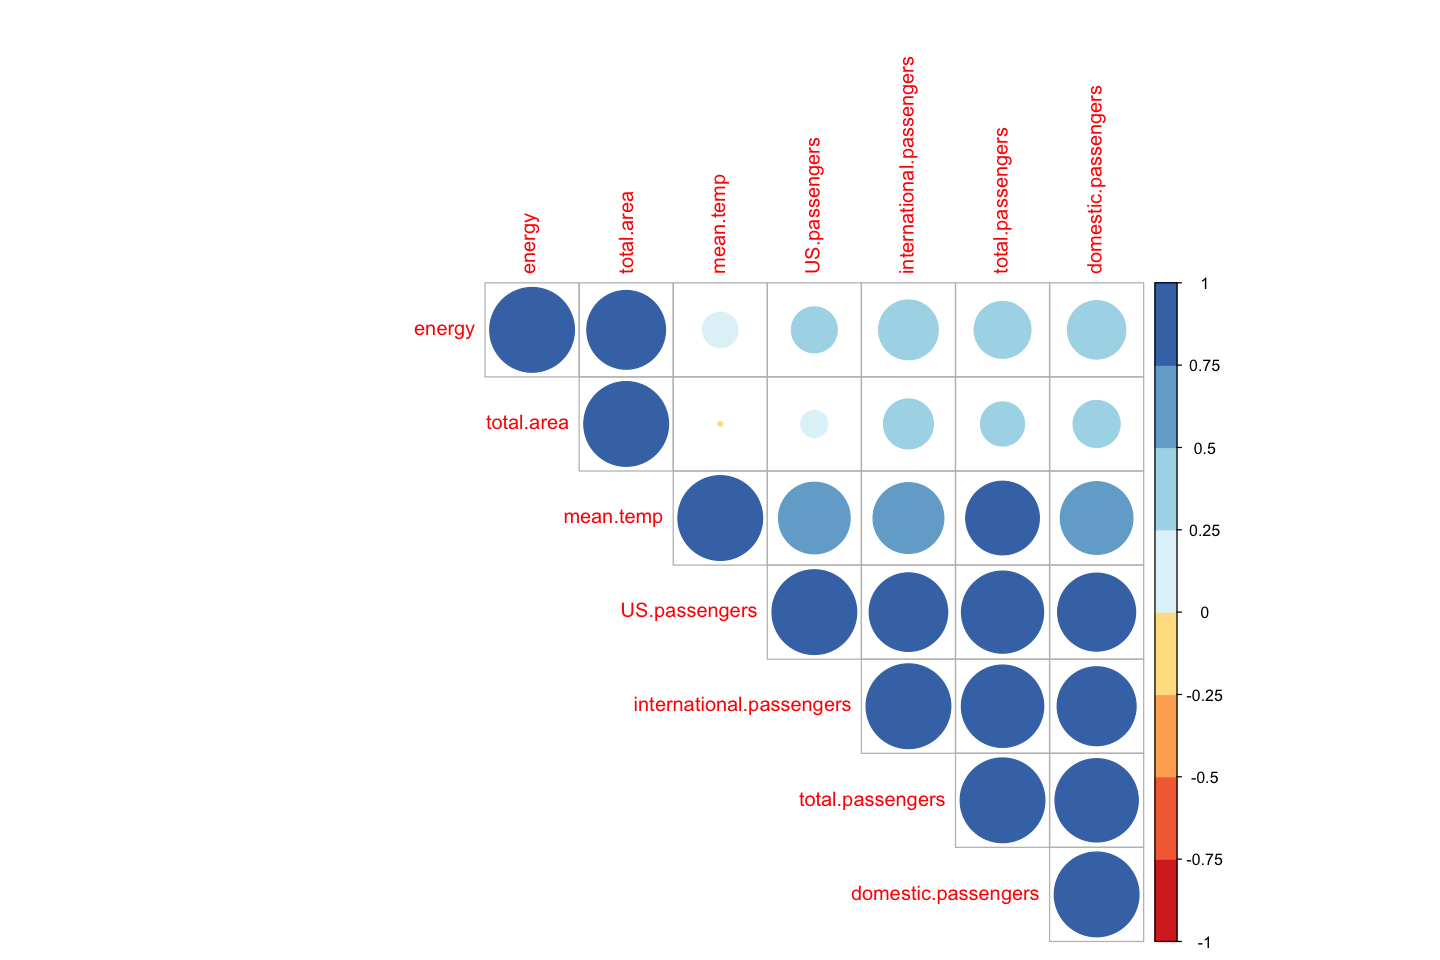

In [20]:
# Checking the correlation
# pairs() would work too
P <- cor(reg_YVR)
print(P)
corrplot(P, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

In [21]:
# Prepare time series data for other variables 
ts_YVRdata_pas<- ts(data = YVR_rawdata[,5], start = c(1997,01,01) , end = c(2010,12,31), frequency = 12)
ts_YVRdata_area <- ts(data = YVR_rawdata[,4], start = c(1997,01,01) , end = c(2010,12,31), frequency = 12)
ts_YVRdata_temp<- ts(data = YVR_rawdata[,3], start = c(1997,01,01) , end = c(2010,12,31), frequency = 12)

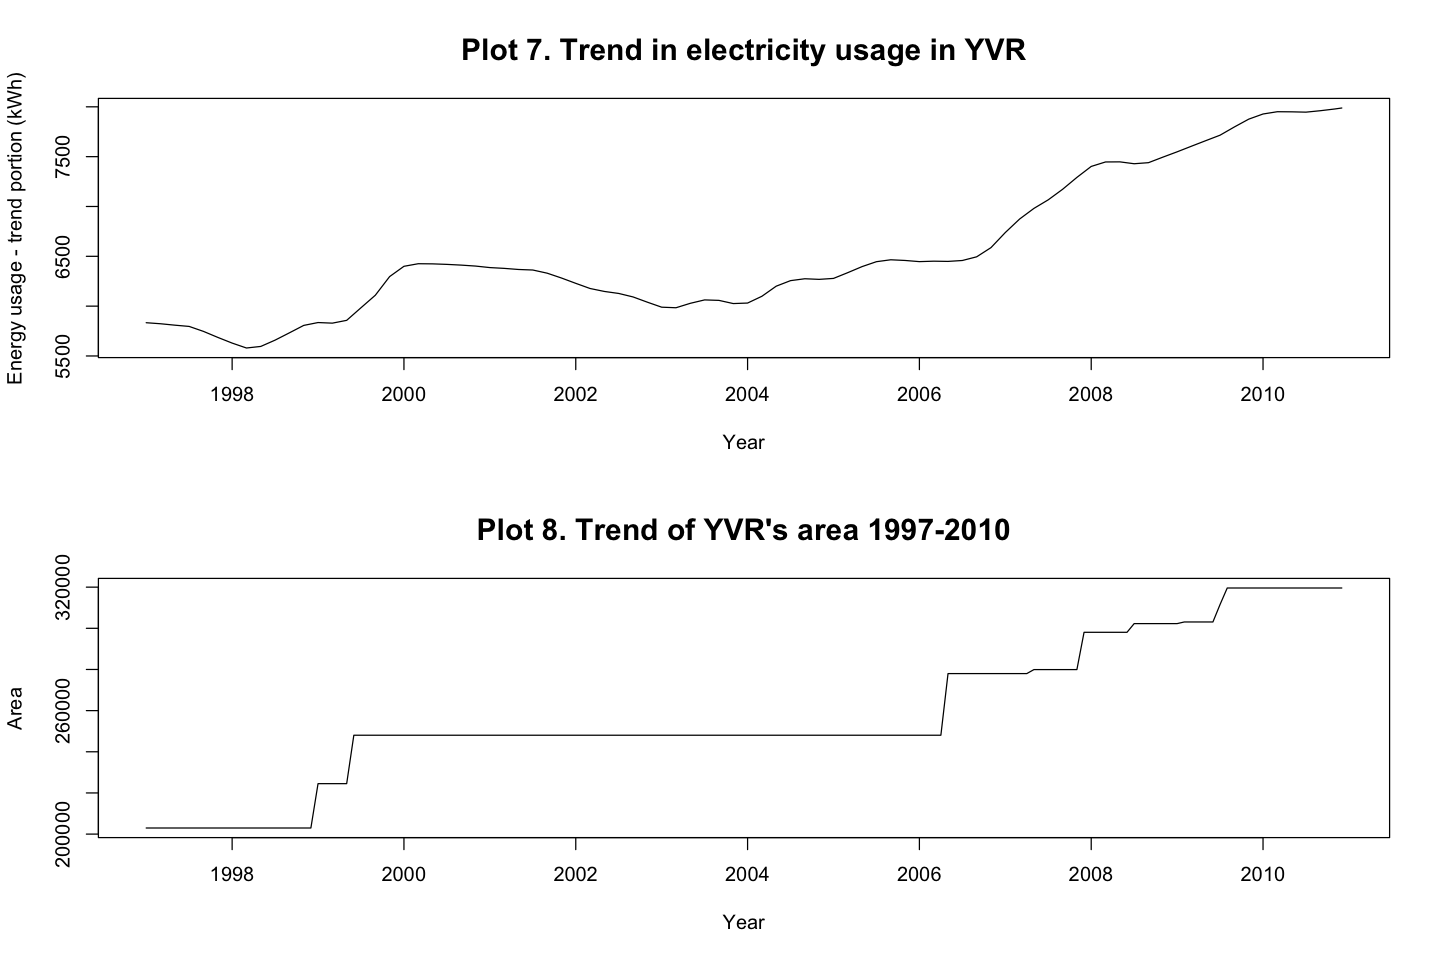

In [22]:
# Plot the trend and area of YVR
par(mfrow=c(2,1))
plot(fit_0$time.series[,2], main="Plot 7. Trend in electricity usage in YVR", 
     ylab="Energy usage - trend portion (kWh)", xlab="Year",cex.main=1.5)
plot(ts_YVRdata_area, main="Plot 8. Trend of YVR's area 1997-2010", 
     ylab="Area", xlab="Year",cex.main=1.5)

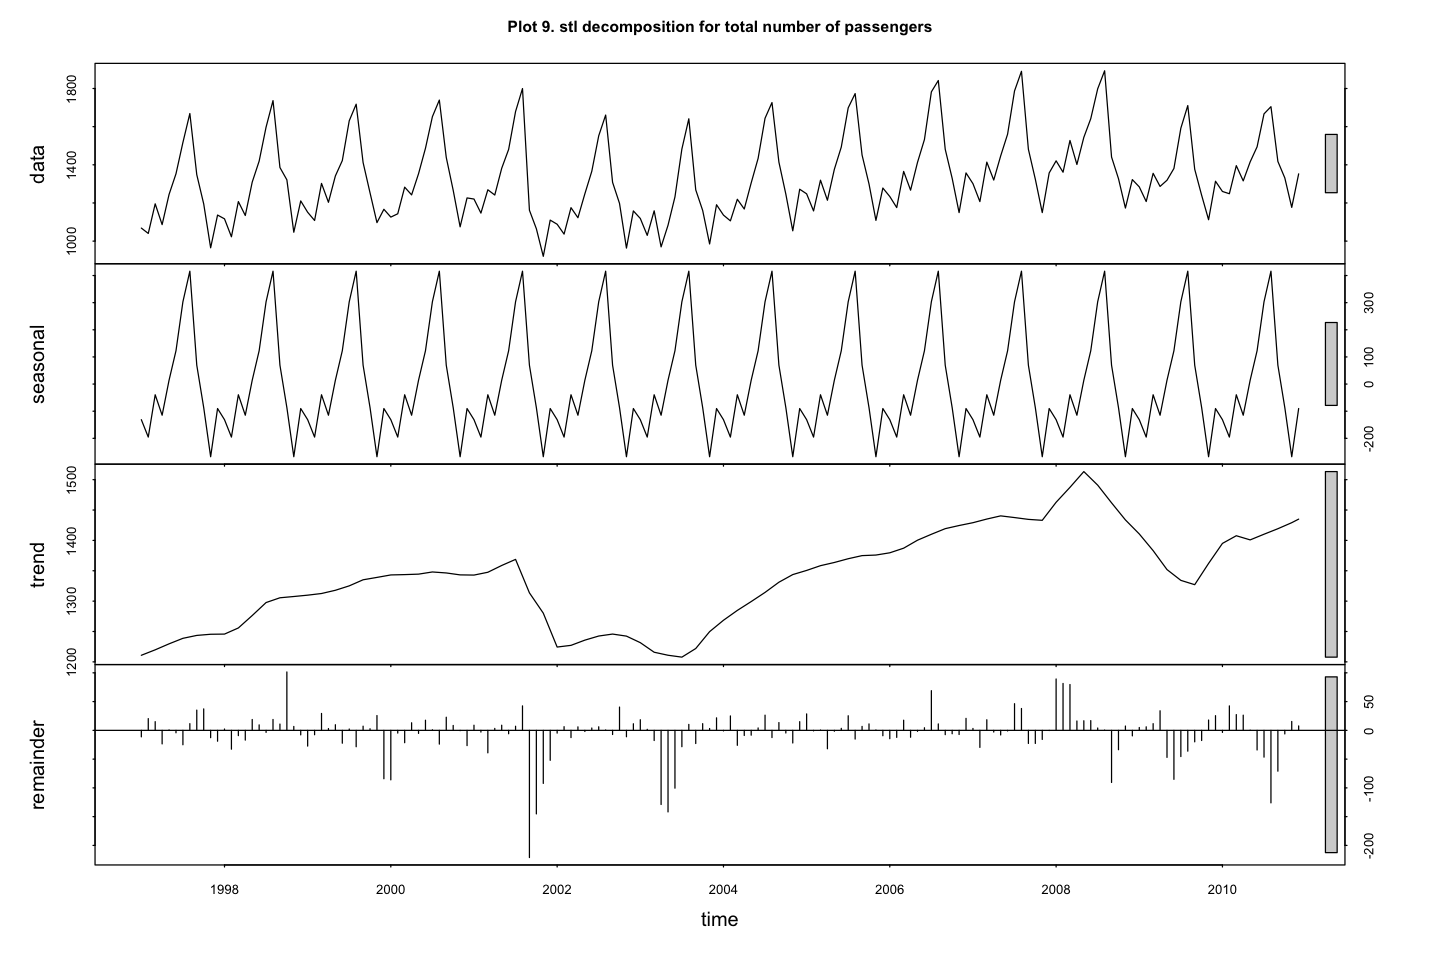

In [23]:
# Look into the seasonality of number of passengers
fit_1 <- stl(ts_YVRdata_pas, t.window=13, s.window="periodic", robust=TRUE)
plot(fit_1, main = "Plot 9. stl decomposition for total number of passengers")

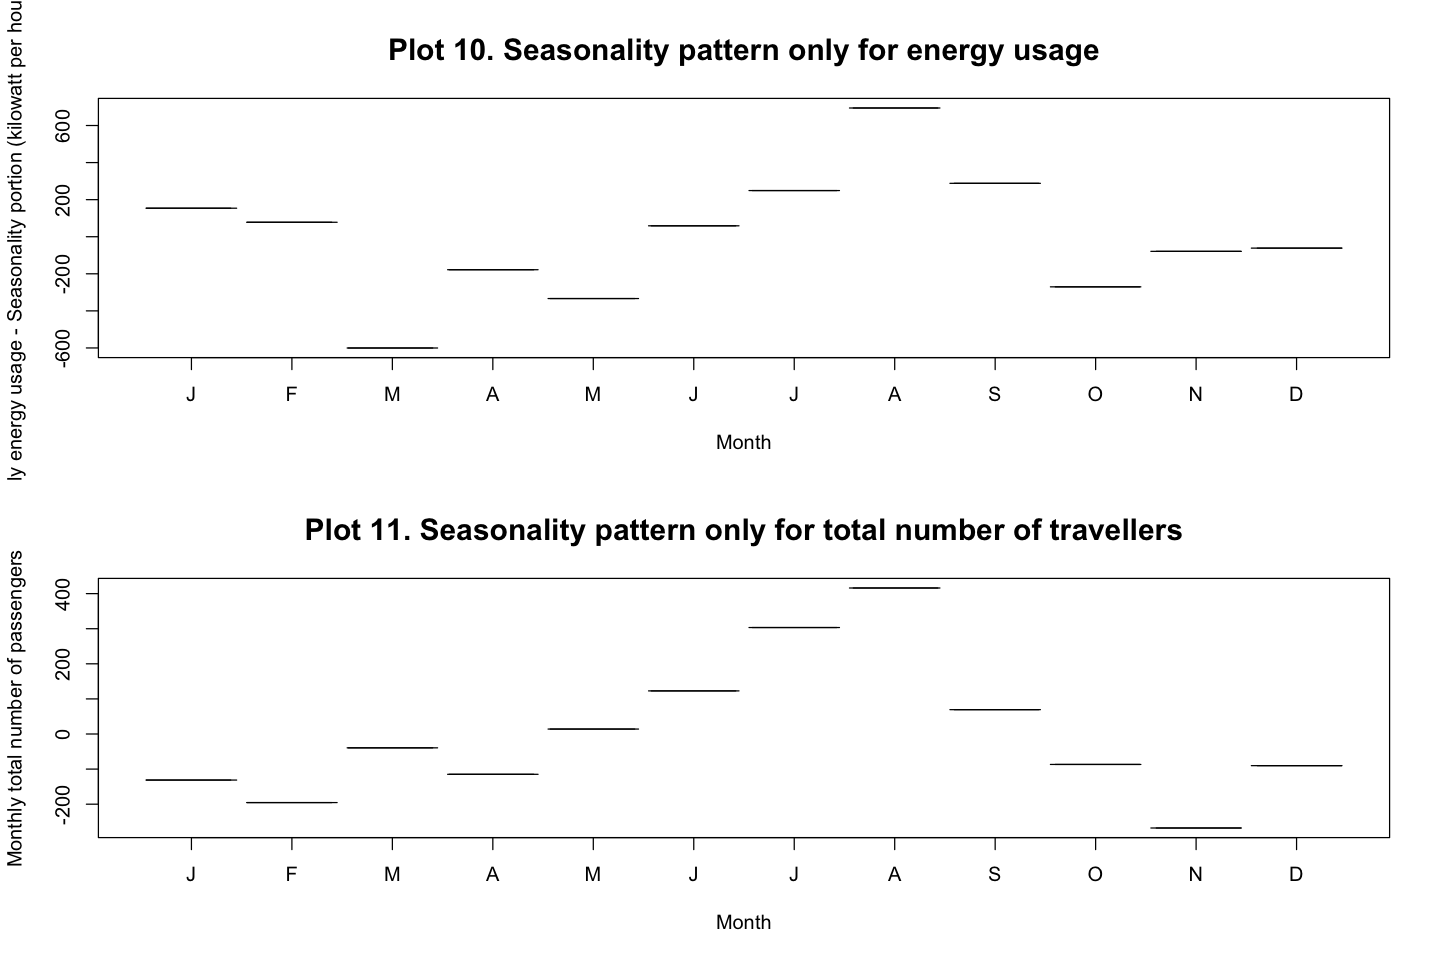

In [24]:
# Compare the seasonality of energy usage and number of passangers 
par(mfrow=c(2,1))
monthplot(seasonal(fit_0), main = "Plot 10. Seasonality pattern only for energy usage", 
          ylab="Monthly energy usage - Seasonality portion (kilowatt per hours [kWh])",
         xlab="Month",
         cex.main=1.5)
monthplot(seasonal(fit_1),main = "Plot 11. Seasonality pattern only for total number of travellers", 
          ylab="Monthly total number of passengers",
         xlab="Month",
         cex.main=1.5)

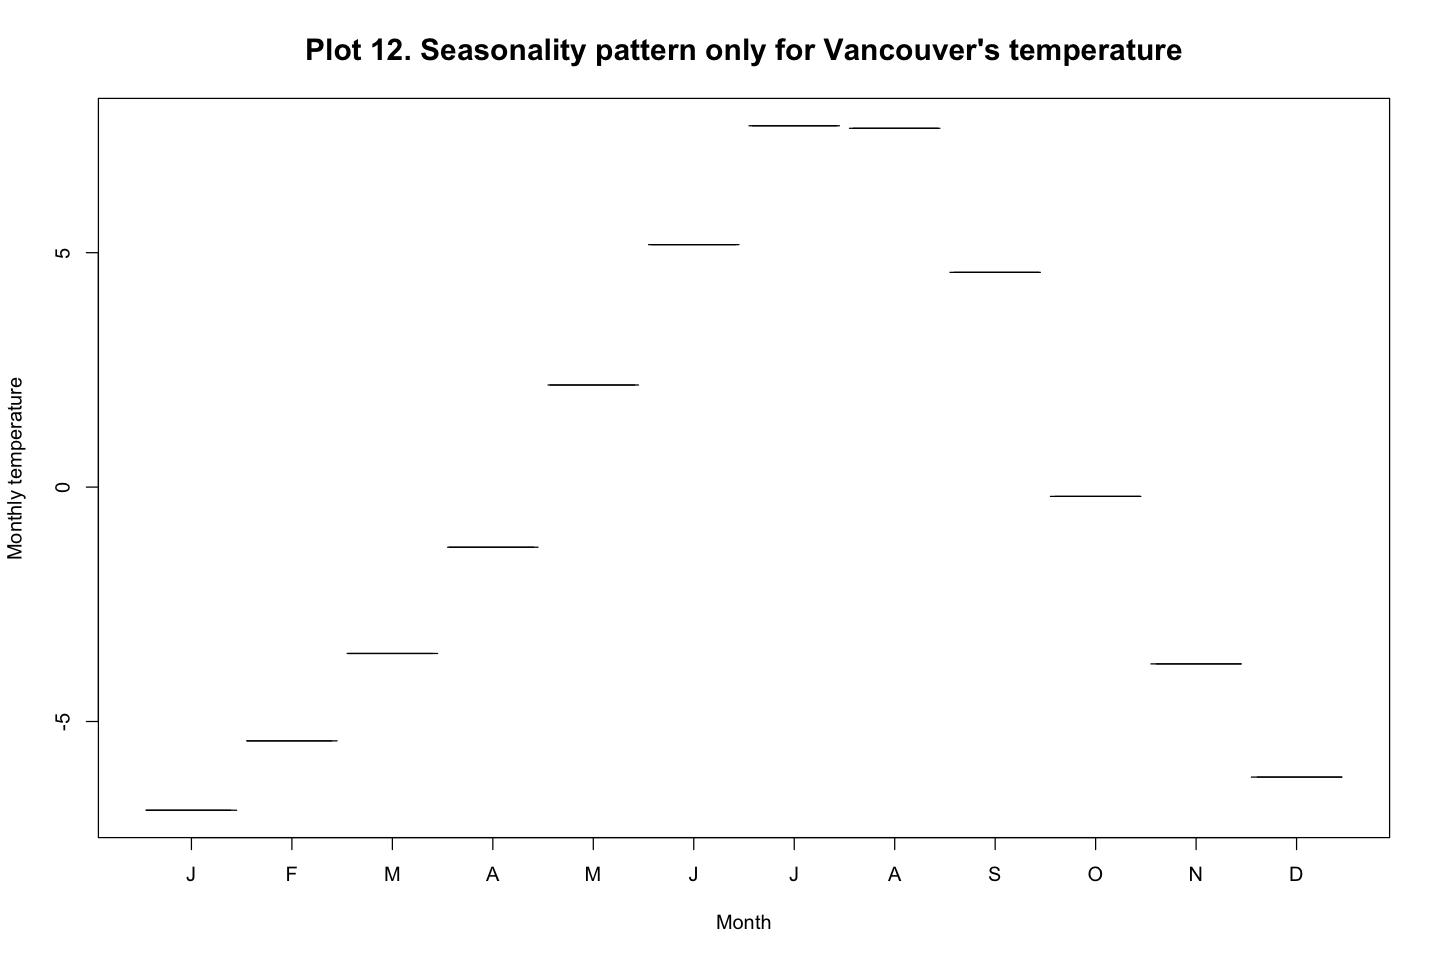

In [25]:
# Tempurature check 
fit_2 <- stl(ts_YVRdata_temp, t.window=13, s.window="periodic", robust=TRUE)
monthplot(seasonal(fit_2), main = "Plot 12. Seasonality pattern only for Vancouver's temperature", 
          ylab="Monthly temperature",
         xlab="Month",cex.main=1.5)

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

In [26]:
#mean 
fit_mean <- meanf(YVRdata_train, 36)
#drift
fit_drift <- rwf(YVRdata_train, 36, drift = TRUE)
#naive
fit_naive <- naive(YVRdata_train, 36)
#seasonal naive
fit_snaive <- snaive(YVRdata_train, 36)

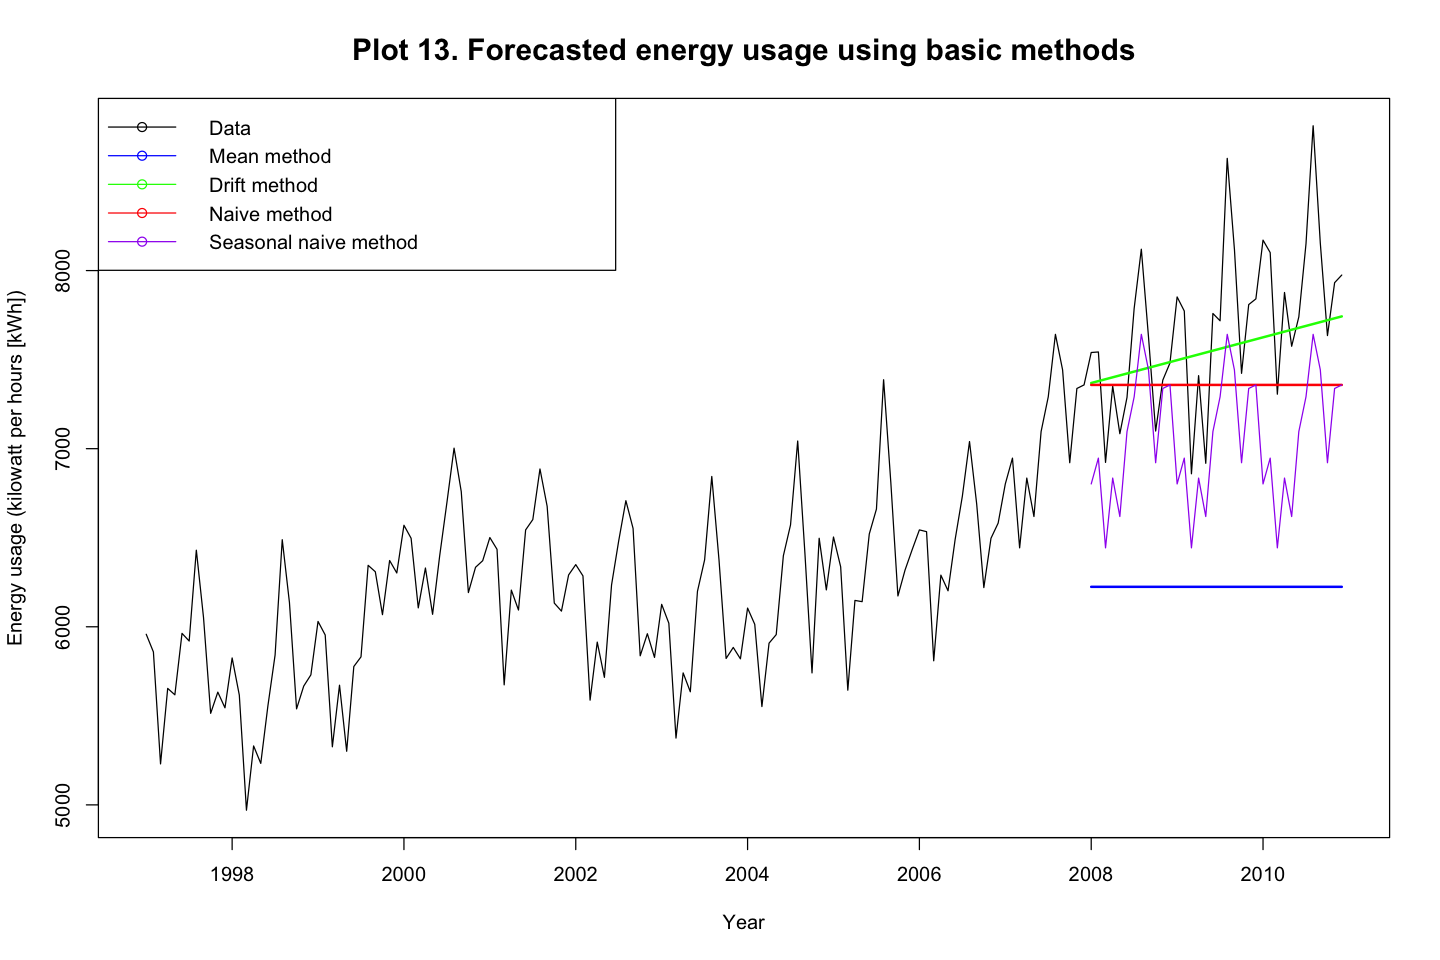

In [27]:
# Plot them into one graph
plot(ts_YVRdata, main="Plot 13. Forecasted energy usage using basic methods",
     ylab="Energy usage (kilowatt per hours [kWh])",
    xlab = "Year",
    cex.main=1.5)
lines(fit_mean$mean,col="blue",lwd = "2")
lines(fit_drift$mean, col = "green",lwd = "2")
lines(fit_naive$mean, col = "red",lwd = "2")
lines(fit_snaive$mean, col = "purple")
legend("topleft",lty=1, col=c("black","blue","green","red","purple"), 
       c("Data", "Mean method","Drift method","Naive method","Seasonal naive method"),pch=1,cex=1) 

From the plot below, we can see that mean method and naïve method provide a constant forecast and perform worse than other two methods. The drift method catches the trend and grows with the time passes by, while the seasonal naïve can capture the seasonality pattern in the data. From visualized perspective, the seasonal naïve performs better. However, if we can combine the drift and seasonal naïve, we would get a more accurate forecast, and we will discuss further in later section.

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [28]:
# Compare accuracy measures for each model 
method <- c("Mean method", "Drift method","Naive method", "Seasonal naive method")
cbind(method, rbind(round(accuracy(fit_mean, YVRdata_test)[2,c(2,3,5,6)],1),
      round(accuracy(fit_drift, YVRdata_test)[2,c(2,3,5,6)],1),
                    round(accuracy(fit_naive, YVRdata_test)[2,c(2,3,5,6)],1),
                    round(accuracy(fit_snaive, YVRdata_test)[2,c(2,3,5,6)],1)))

method                RMSE   MAE    MAPE MASE
[1,] Mean method           1528.5 1463.8 18.8 5.5 
[2,] Drift method          416    328.5  4.2  1.2 
[3,] Naive method          550.1  443.2  5.6  1.7 
[4,] Seasonal naive method 698.7  626.8  8    2.4

## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 


Based on the accuracy measures for the test set, the drift has lowest measures among four methods in terms of RMSE, MAE, MAPE and MASE. We can focus on the MASE which is short for mean absolute scale error. Of MASE, the seasonal naïve would be selected as the base method as scaler for seasonal data, and MASE is the figures comparing the method to scaler method. The MASE for drift method is 1.2 (using test data) which is approximately the same but slightly worse than the seasonal naïve method using training data. 


----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

The model is ETS(M, A, A)

In [29]:
ets_MAA = ets(YVRdata_train, model="MAA"); summary(ets_MAA)

ETS(M,A,A) 

Call:
 ets(y = YVRdata_train, model = "MAA") 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set -6.611667 126.3696 99.4423 -0.1458104 1.602955 0.3752775
                    ACF1
Training set -0.02754951

In [30]:
# potential models set up
ets_AAA = ets(YVRdata_train, model="AAA")
ets_AAA_d = ets(YVRdata_train, model="AAA", damped = TRUE)
ets_MAA = ets(YVRdata_train, model="MAA")
ets_MAA_d = ets(YVRdata_train, model="MAA", damped = TRUE)
# test_ets_AMA = ets(YVRdata_train, model="AMA") # Forbidden model conbination
# test_ets_MMA = ets(YVRdata_train, model="MMA") # Forbidden model conbination
auto_ets = ets(YVRdata_train)

## What are the estimates of the smoothing parameters? (0.25 marks)

In [31]:
summary(ets_MAA)$par[c(1:3)]

alpha         beta        gamma 
0.8082174820 0.0001031903 0.0001203417

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

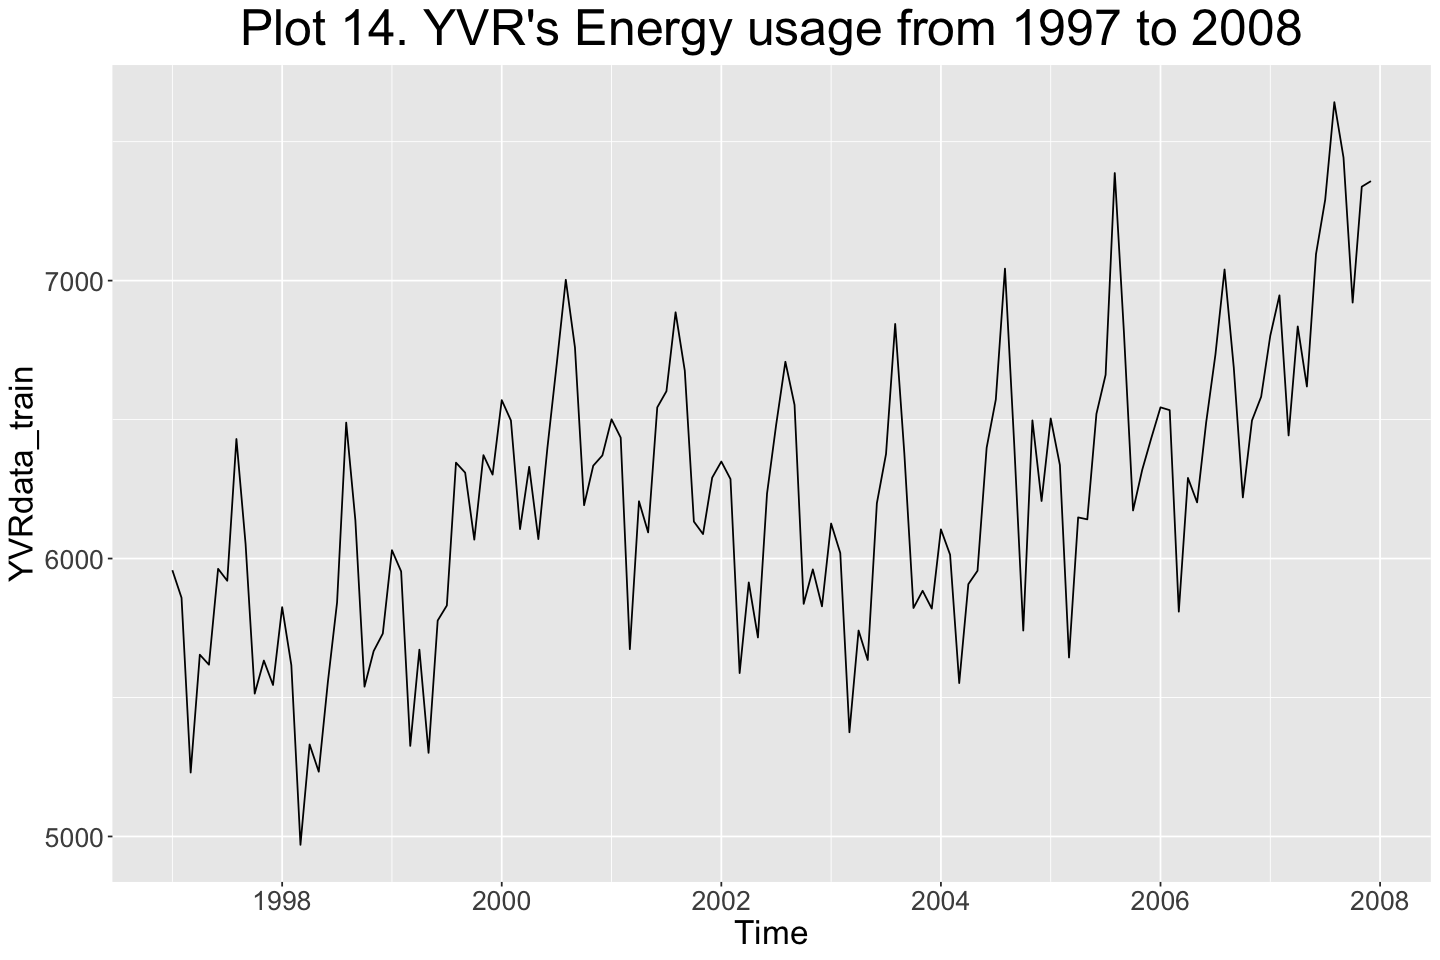

In [32]:
autoplot(YVRdata_train)+
theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5, size=30)) +
ggtitle("Plot 14. YVR's Energy usage from 1997 to 2008") 

The original time plot shows that there is seasonality that repeats every 12 months without proportionally increasing seasonality variation over time, indicating that the model should use S = additive. There is a stable trend without expotential growth, indicating that the model should use T = additive and no dampen needed. In the end, using E = multiplicative would be better because the data are strictly positive and because it beats the forecast performance of using additive method.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

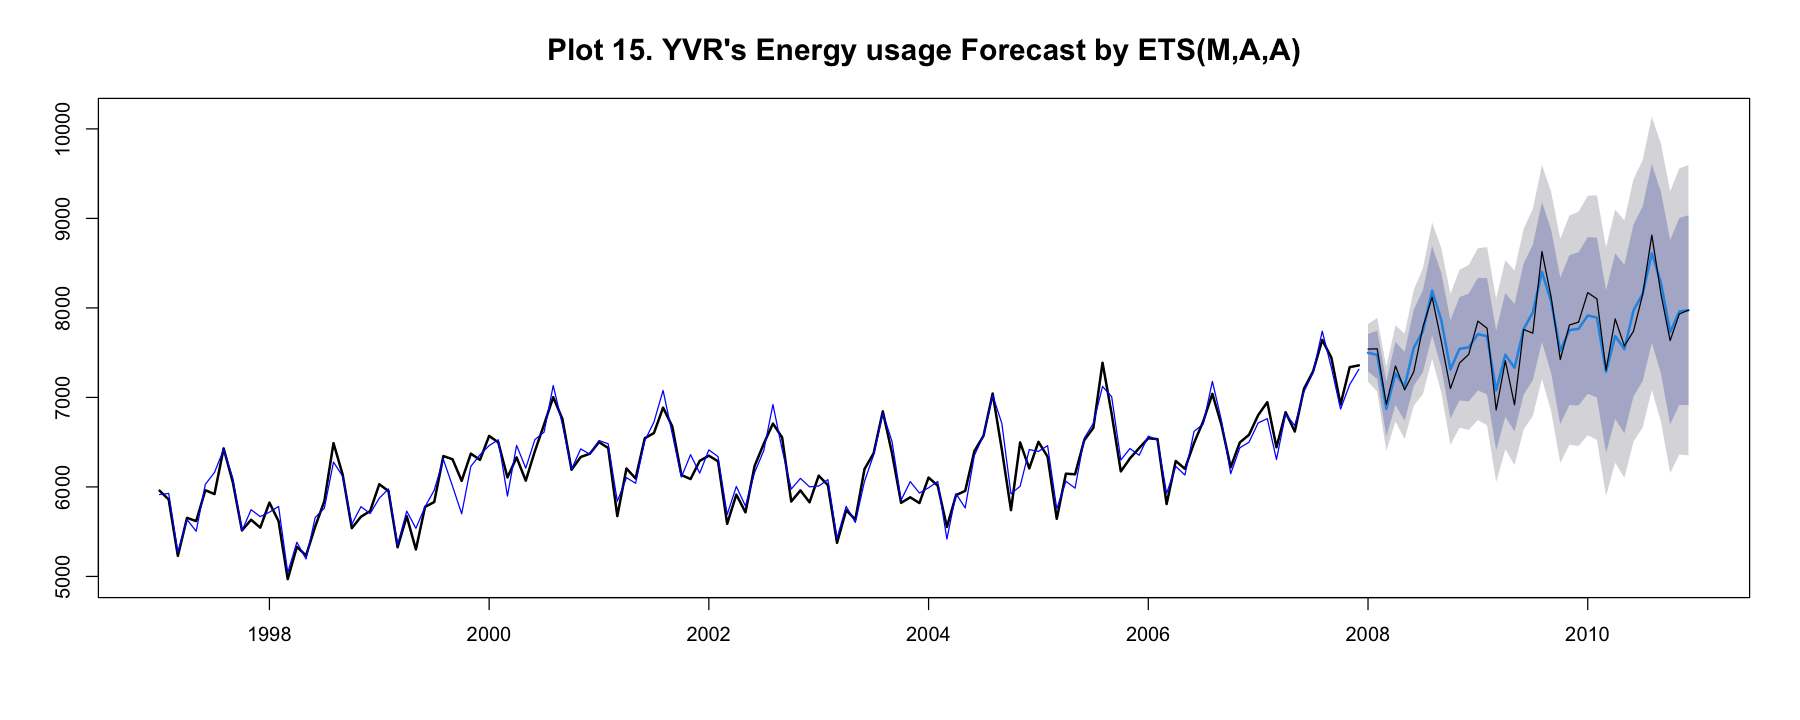

In [33]:
options(repr.plot.width=15, repr.plot.height=6)
plot(forecast(ets_MAA, h=length(YVRdata_test)), YVRdata_test,
    main="Plot 15. YVR's Energy usage Forecast by ETS(M,A,A)",
     cex.main=1.5
    )
lines(YVRdata_train, lwd=2)
lines(fitted(ets_MAA), col='blue')
lines(YVRdata_test, lwd=1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [34]:
method <- c("AAA", "AAA damped", "MAA", "MAA damped","Auto")
cbind(method, 
      round(rbind(
          accuracy(ets_AAA) [1,c(2,3,5,6)], 
          accuracy(ets_AAA_d) [1,c(2,3,5,6)],
          accuracy(ets_MAA) [1,c(2,3,5,6)],
          accuracy(ets_MAA_d) [1,c(2,3,5,6)],
          accuracy(auto_ets) [1,c(2,3,5,6)]
          ),4))

method     RMSE     MAE     MAPE   MASE  
[1,] AAA        126.2613 98.9585 1.5943 0.3735
[2,] AAA damped 126.7748 99.1511 1.5909 0.3742
[3,] MAA        126.3696 99.4423 1.603  0.3753
[4,] MAA damped 127.2418 99.5415 1.5952 0.3757
[5,] Auto       126.6517 98.0999 1.5698 0.3702

Among all models shown above, ets(A,A,A) shows the best performance of fitting the training dataset in terms of four measures (RMSE, MAE, MAPE, MASE). In the meantime, the selected model ets (M, A, A) has similar measure values as ets(A, A, A) model. As it is likely that ets(A, A, A) overfits the training data set, it is still hard to tell which one will perform the best on the test data set at this stage.

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [35]:
accuracy(forecast(ets_MAA, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
155.9826267 123.1789301   1.6140187   0.4648554

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

In [36]:
method <- c("AAA", "AAA damped", "MAA", "MAA damped","Auto","Drift","Seasonal naive")
cbind(method, 
      round(rbind(
          accuracy(forecast(ets_AAA, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)], 
          accuracy(forecast(ets_AAA_d, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(ets_MAA, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(ets_MAA_d, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(auto_ets, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_drift, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_snaive, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)]
          ),4))

method         RMSE     MAE      MAPE   MASE  
[1,] AAA            188.9986 155.896  2.0037 0.5883
[2,] AAA damped     381.1634 312.7107 3.967  1.1801
[3,] MAA            155.9826 123.1789 1.614  0.4649
[4,] MAA damped     396.5038 325.6249 4.1306 1.2289
[5,] Auto           386.4068 315.9373 4.0093 1.1923
[6,] Drift          415.979  328.4824 4.2133 1.2396
[7,] Seasonal naive 698.6573 626.8333 8.0386 2.3656

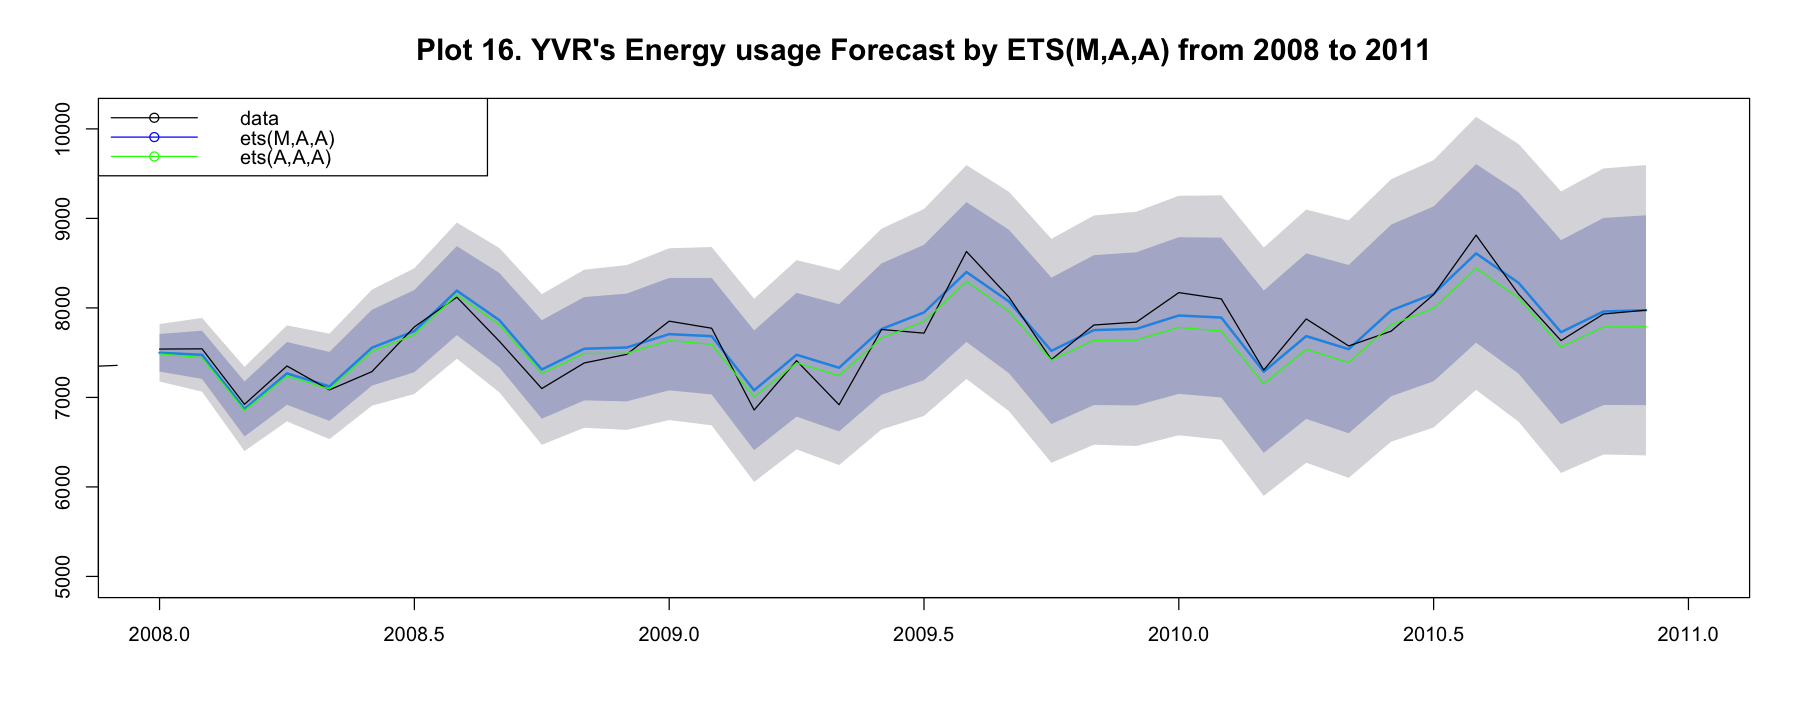

In [37]:
plot(forecast(ets_MAA, h=length(YVRdata_test)), YVRdata_test, xlim = c(2008, 2011),
    main="Plot 16. YVR's Energy usage Forecast by ETS(M,A,A) from 2008 to 2011",
     cex.main=1.5
    )
# lines(YVRdata_train, lwd=2)
# lines(fitted(ets_MAA), col='blue')
lines(YVRdata_test, lwd=1)
lines(forecast(ets_AAA, h= length(YVRdata_test))$mean, col='green')
legend(
    "topleft",
    lty=1, 
    col=c(1,"blue","green"), 
    c("data", "ets(M,A,A)", "ets(A,A,A)"),
    pch=1) 


Among all the models considered so far, the ets(M,A,A) shows the best forecast result on the testing data set, successfully combining the benefits of drift and seasonal naive methods. Based on the table above, the ets(M,A,A) also has relatively higher accuracy than other basic methods. Comparing with ets(A,A,A) model, the Plot 16 shows that ets(M,A,A) forecasts better in the peak time.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

[1] -0.001043112


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 8, p-value = 0.1315

Model df: 16.   Total lags used: 24



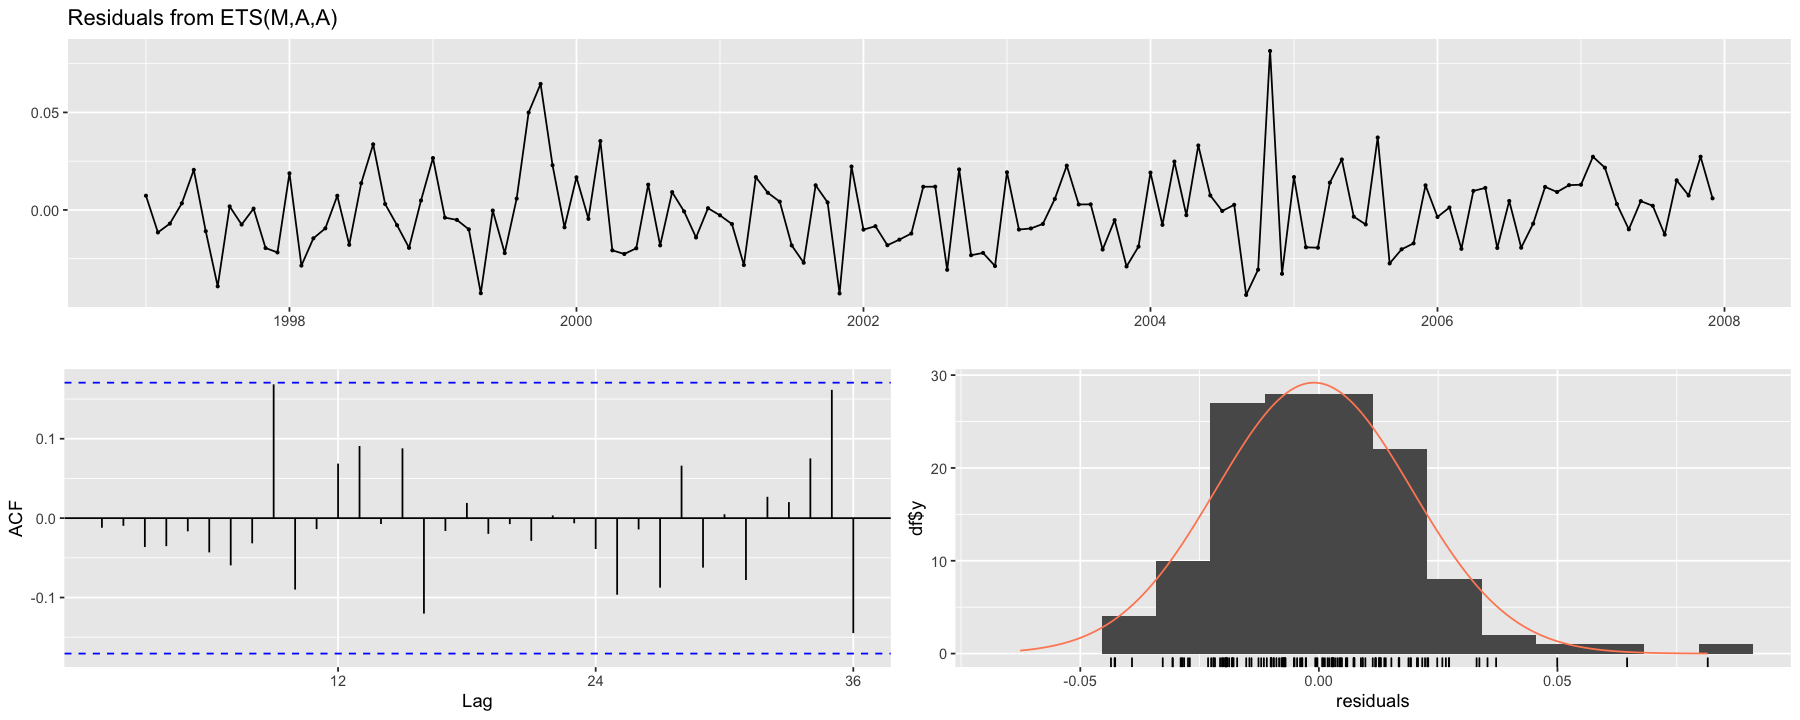

In [38]:
mean(residuals(ets_MAA))
checkresiduals(ets_MAA) 

The mean of residuals is close to zero, indicating no bias. 

In the ACF plot, there is no significant autocorrelations and the variance of residuals stays approximately constant through time. According to the histogram plot, the residuals are approximately normally distributed, but there is an outliers which might be due to random chance.

In the portmanteau test, the hypothesis are as below:
- H0: the first 24 autocorrelations are not significantly different from a white noise process
- HA: the first 24 autocorrelations are significantly different from a white noise process

The total number of lags tested is 24. The test statistic is 12.469, and the p-value is 0.1315. As the p-value is larger than 0.05, it cannot reject the null hypothesis and concludes that the first 24 autocorrelations are not statistically significantly different from a white noise process.

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

The model is ARIMA(1,1,0)X(0,1,1)12

In [39]:
arima_fit4 = Arima(YVRdata_train, order = c(1,1,0), seasonal = c(0,1,1), include.constant=TRUE)
summary(arima_fit4)

Series: YVRdata_train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1972  -0.8927
s.e.   0.0905   0.1794

sigma^2 = 18824:  log likelihood = -762.54
AIC=1531.08   AICc=1531.29   BIC=1539.42

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 9.495075 129.171 93.95688 0.1257726 1.494625 0.3545766 -0.01035696

In [40]:
# candidate model set up
arima_fit1 = Arima(YVRdata_train, order = c(0,1,1), seasonal = c(3,1,0), include.constant=TRUE)
arima_fit2 = Arima(YVRdata_train, order = c(1,1,0), seasonal = c(3,1,0), include.constant=TRUE) 
arima_fit3 = Arima(YVRdata_train, order = c(0,1,1), seasonal = c(0,1,1), include.constant=TRUE) 
arima_fit4 = Arima(YVRdata_train, order = c(1,1,0), seasonal = c(0,1,1), include.constant=TRUE) 
arima_auto = auto.arima(YVRdata_train, stepwise=FALSE, approximation=FALSE, ic="aicc")

## What are the estimates of the parameters? (0.25 marks)

In [41]:
summary(arima_fit4)[1]

$coef
       ar1       sma1 
-0.1972471 -0.8926688

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

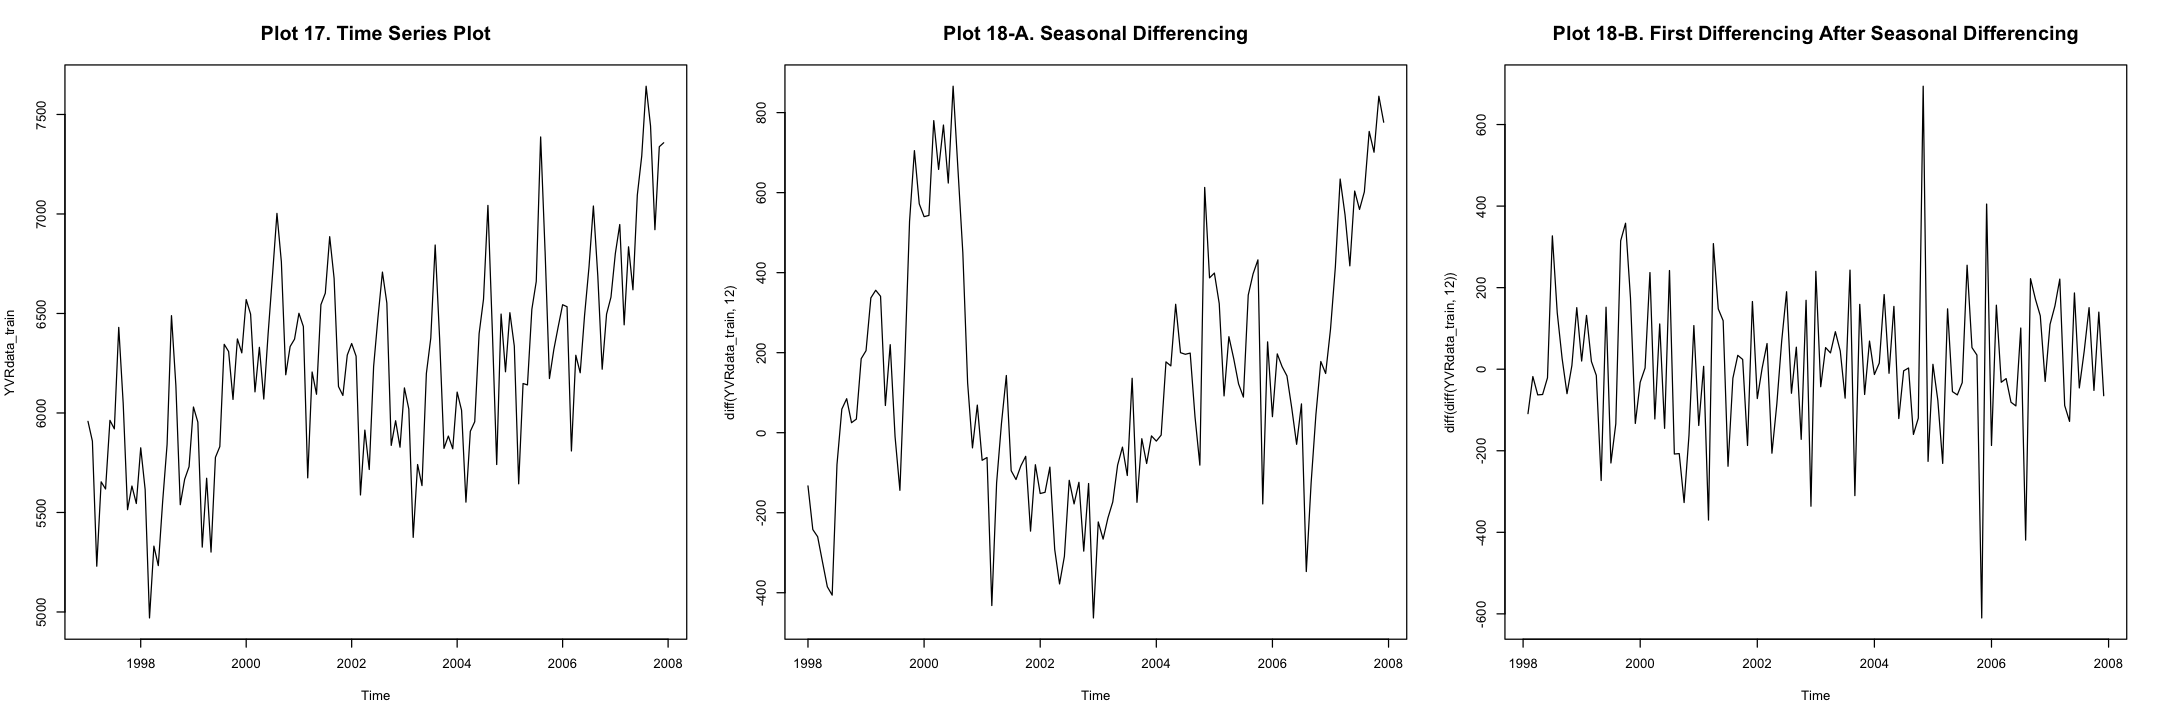

In [42]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow = c(1,3))
plot(YVRdata_train, main="Plot 17. Time Series Plot",cex.main=1.5)
plot(diff(YVRdata_train,12),  main="Plot 18-A. Seasonal Differencing",cex.main=1.5)
plot(diff(diff(YVRdata_train,12)),  main="Plot 18-B. First Differencing After Seasonal Differencing",cex.main=1.5)

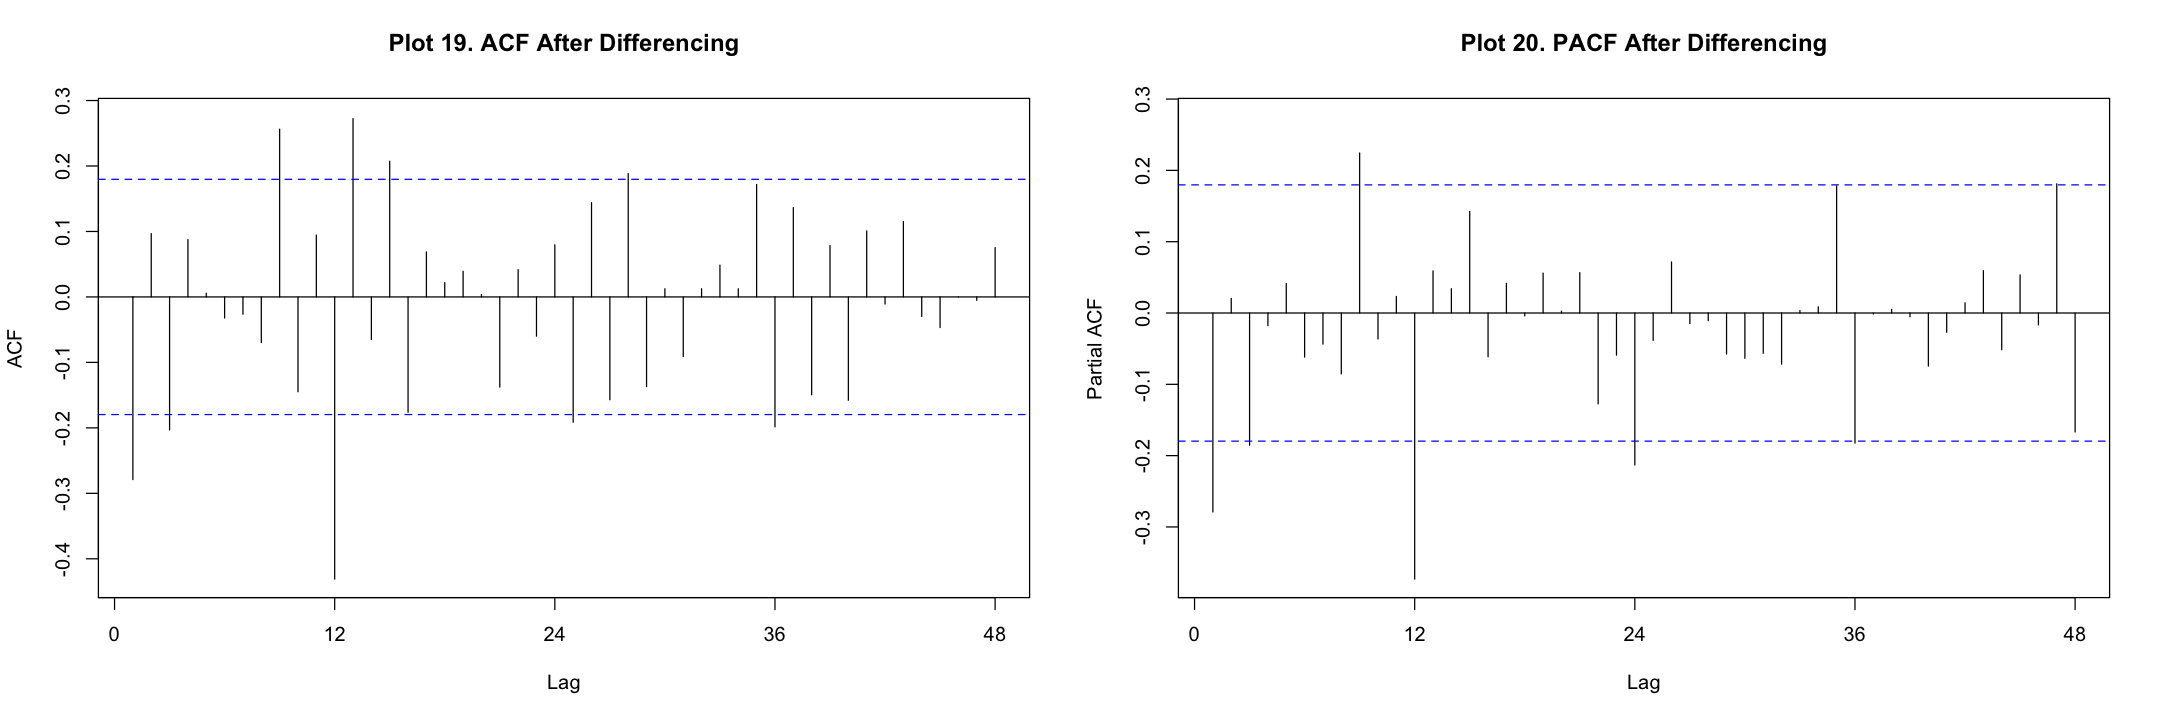

In [43]:
par(mfrow=c(1,2))
Acf( diff( diff(YVRdata_train, 12),  1 ) , lag=48, main="Plot 19. ACF After Differencing",cex.main=1.5)
Pacf(diff( diff(YVRdata_train, 12),  1 ) , lag=48, main="Plot 20. PACF After Differencing",cex.main=1.5)
# ggtsdisplay(diff( diff(YVRdata_train, 48),  1 ), lag=48)

The original time plot (Plot 17) shows that there is seasonality that repeats every 12 months (this is the value of m), indicating that we should use D=1 and do seasonal differencing of lag-12. After the seasonal differencing, the series has some trend (Plot 18-A), indicating that we should use d=1 and render the series stationary (Plot 18-B). As including constant when d+D larger than 1 is dangerous, we do not add constant here.

Viewing the ACF and PACF of the series after differencing (Plot 19, 20), we start by looking at the seasonal lags only (m, 2m, 3m, etc.) and it looks like the ACF is simpler, indicating that we should include Q = 1 in our model in seasonality parts.

Looking at the non-seasonal lags (up to but not including lag m), since both plots have 1 significant lag, having p=1 or q=1 in our model makes sense, and we decide to use q = 1 because of the better final performance on the testing dataset, which is shown in the following analysis.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

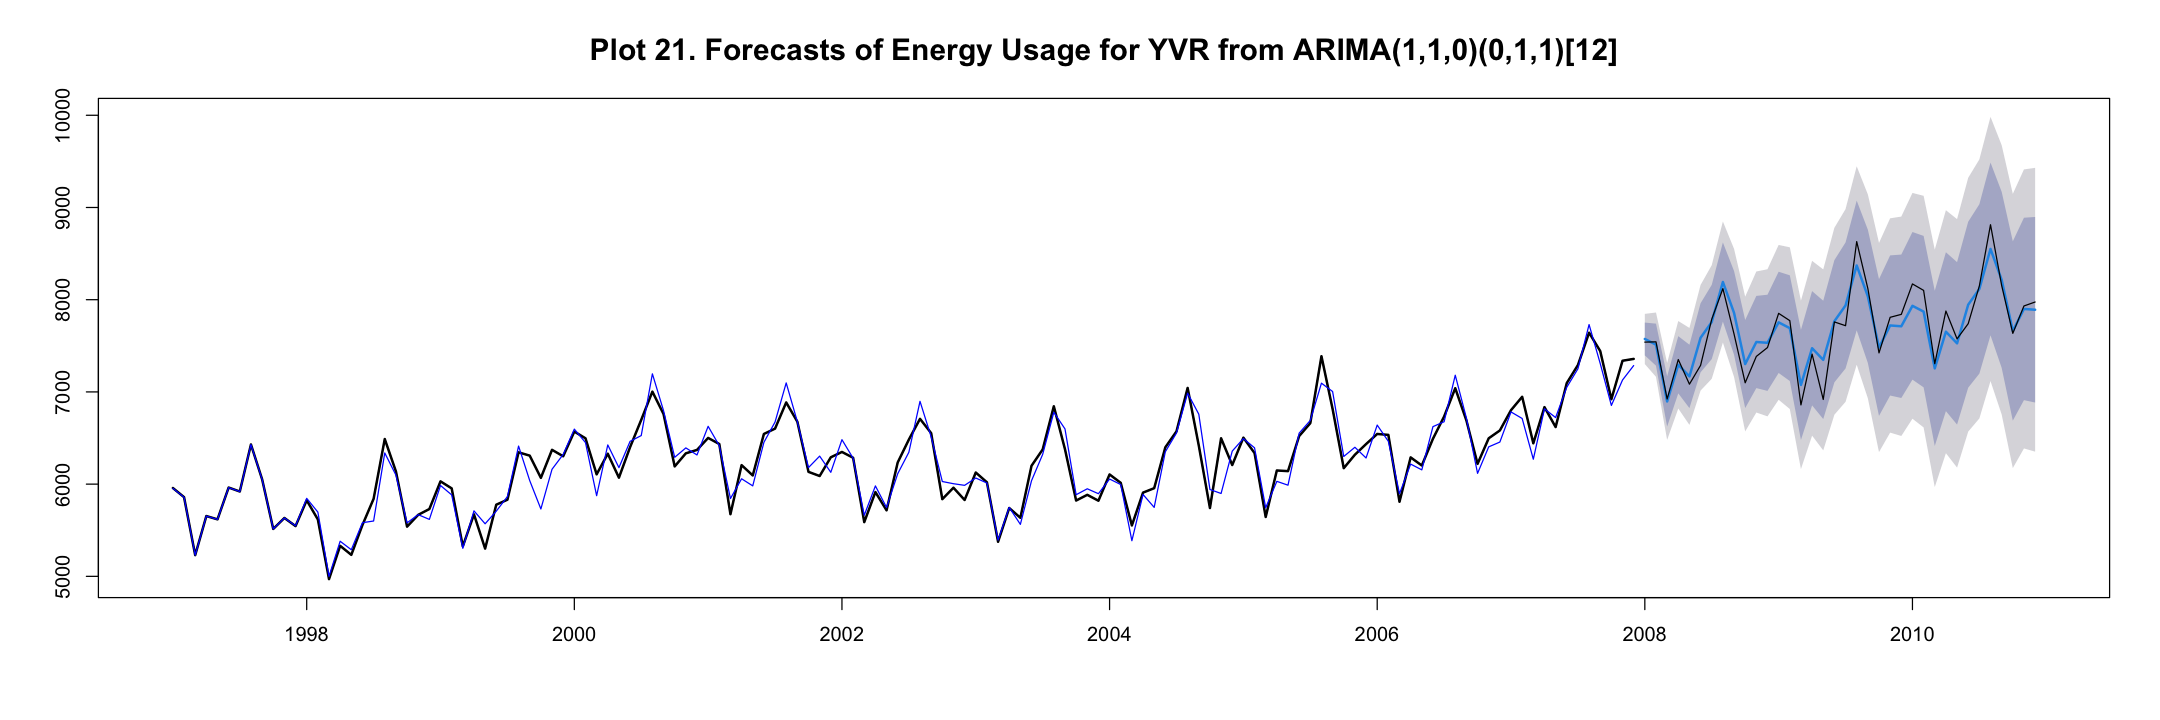

In [44]:
plot(forecast(arima_fit4, h=length(YVRdata_test)), YVRdata_test,
    main="Plot 21. Forecasts of Energy Usage for YVR from ARIMA(1,1,0)(0,1,1)[12]",
    cex.main=1.5
    )
lines(YVRdata_train, lwd=2)
lines(fitted(arima_fit4), col='blue')
lines(YVRdata_test, lwd=1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [45]:
models_aicc <- c(
    "First: (0,1,1)(3,1,0)[12]  AICc", 
    "Second: (1,1,0)(3,1,0)[12]  AICc",
    "Third: (0,1,1)(0,1,1)[12]  AICc", 
    "Fourth: (1,1,0)(0,1,1)[12]  AICc",
    "Auto.arima  (1,1,0)(2,1,0)[12] AICc")
aicc = c(
          arima_fit1$aicc,
          arima_fit2$aicc,
          arima_fit3$aicc,
          arima_fit4$aicc,
          arima_auto$aicc
          )

cbind(models_aicc, round(aicc,4))

models_aicc                                  
[1,] First: (0,1,1)(3,1,0)[12]  AICc     1540.2776
[2,] Second: (1,1,0)(3,1,0)[12]  AICc    1540.1133
[3,] Third: (0,1,1)(0,1,1)[12]  AICc     1531.2056
[4,] Fourth: (1,1,0)(0,1,1)[12]  AICc    1531.2924
[5,] Auto.arima  (1,1,0)(2,1,0)[12] AICc 1548.2476

Compared to the top two models and auto Arima model, the third and fourth models demonstrate quite lower AICc values, indicating these two models perform better. However, as the AICc values of these two models are almost the same, it is still hard to tell which one will perform better on the testing data set. Also, it is reasonable that they have similar AICc values because both p=1 or q=1 in the non-seasonality part make sense as we discussed above.

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [46]:
accuracy(forecast(arima_fit4, h=length(YVRdata_test)), YVRdata_test)

ME        RMSE     MAE       MPE        MAPE     MASE     
Training set  9.495075 129.1710  93.95688  0.1257726 1.494625 0.3545766
Test set     -9.243577 159.9366 125.09305 -0.2000004 1.633898 0.4720790
             ACF1        Theil's U
Training set -0.01035696        NA
Test set      0.22421431 0.3373746

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

In [47]:
method <- c(
    "Third: (0,1,1)(0,1,1)[12] ", 
    "Fourth: (1,1,0)(0,1,1)[12] ",
    "Drift",
    "Seasonal naive"
)
cbind(method, 
      round(rbind(
          accuracy(forecast(arima_fit3, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(arima_fit4, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_drift, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_snaive, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)]
          ),4))

method                      RMSE     MAE      MAPE   MASE  
[1,] Third: (0,1,1)(0,1,1)[12]   161.6306 128.2304 1.6685 0.4839
[2,] Fourth: (1,1,0)(0,1,1)[12]  159.9366 125.0931 1.6339 0.4721
[3,] Drift                       415.979  328.4824 4.2133 1.2396
[4,] Seasonal naive              698.6573 626.8333 8.0386 2.3656

Based on the Plot 21, this fourth Arima(1,1,0)(0,1,1)[12] model can fit the traning data well and also show an accurate forecast because the black line (real data) and blue line (forecast) are close. Compared with other Arima models, this fourth Arima model's accuracy measures (RMSE, MAE, MAPE, MASE) are lower than all of them. When comparing with the basic methods such as drift method and seasonal naive method, the fourth Arima model's measures significantly outperform all the others'.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

Mean of the residuals: 9.495075
	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 17.722, df = 22, p-value = 0.7223

Model df: 2.   Total lags used: 24



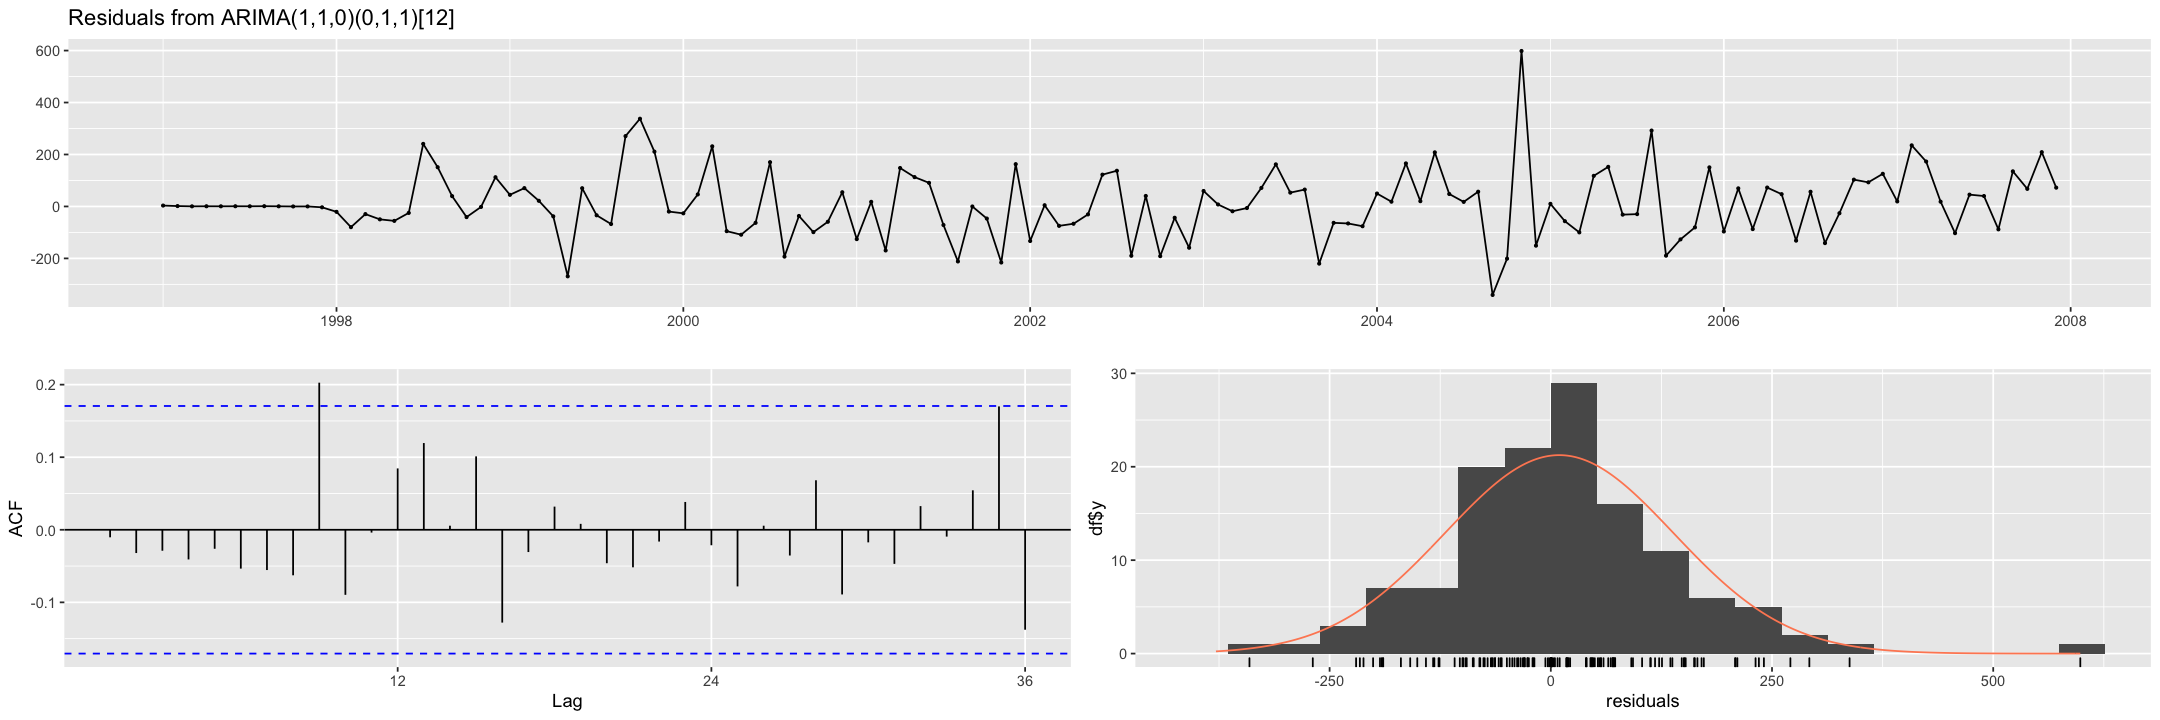

In [48]:
cat('Mean of the residuals:',mean(residuals(arima_fit4)))
checkresiduals(arima_fit4)

The mean of residuals is around 9.5, indicating that there is some bais and that there is still some information this model cannot capture.

In the ACF plot, there is one significant autocorrelations at lag-9 and the variance of residuals stays approximately constant through time. According to the histogram plot, the residuals are approximately normally distributed, but there is an outlier which is due to sudden increase of residuals in around 2005.

In the portmanteau test, the hypothesis are as below:
- H0: the first 24 autocorrelations are not significantly different from a white noise process
- HA: the first 24 autocorrelations are significantly different from a white noise process

The total number of lags tested is 24. The test statistic is 17.722, and the p-value is 0.7223. As the p-value is larger than 0.05, it cannot reject the null hypothesis and concludes that the first 24 autocorrelations are not statistically significantly different from a white noise process.

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


Among all the basic, ETS, and Arima methods, the ETS(M,A,A) shows the best performance in terms of four measures (RMSE, MAE, MAPE, MASE) and thus becomes our final model. Viewing these methods in detail, it is obvious that the four basic methods are far worse than other models. The reason is that most of them are linear lines while forecasting seasonal data and that the only model considering seasonality does not take the trend into account. As for the ETS and Arima models, their performances are quite similar but the ETS model is better. The reason can be proved by the non-zero mean of residuals in the Arima model. With the non-zero mean of residuals, the Arima model does not capture all the important information so its forecast is not as accuracy as the ETS model. When viewing the Plot 23 the forecast line of the ETS model follows closer than all other forecast lines, indicating that the ETS is better than other models.

In [49]:
method <- c(
    "ETS(M,A,A) ", 
    "Final Arima model (1,1,0)(0,1,1)[12] ",
    "Mean method", 
    "Drift method",
    "Naive method", 
    "Seasonal naive method"
)
cbind(method, 
      round(rbind(
          accuracy(forecast(ets_MAA, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(arima_fit4, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_mean, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_drift, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_naive, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)],
          accuracy(forecast(fit_snaive, h=length(YVRdata_test)) , YVRdata_test)[2,c(2,3,5,6)]
          ),4))

method                                RMSE      MAE       MAPE    MASE  
[1,] ETS(M,A,A)                            155.9826  123.1789  1.614   0.4649
[2,] Final Arima model (1,1,0)(0,1,1)[12]  159.9366  125.0931  1.6339  0.4721
[3,] Mean method                           1528.4982 1463.7955 18.7756 5.5241
[4,] Drift method                          415.979   328.4824  4.2133  1.2396
[5,] Naive method                          550.0588  443.1944  5.6035  1.6725
[6,] Seasonal naive method                 698.6573  626.8333  8.0386  2.3656

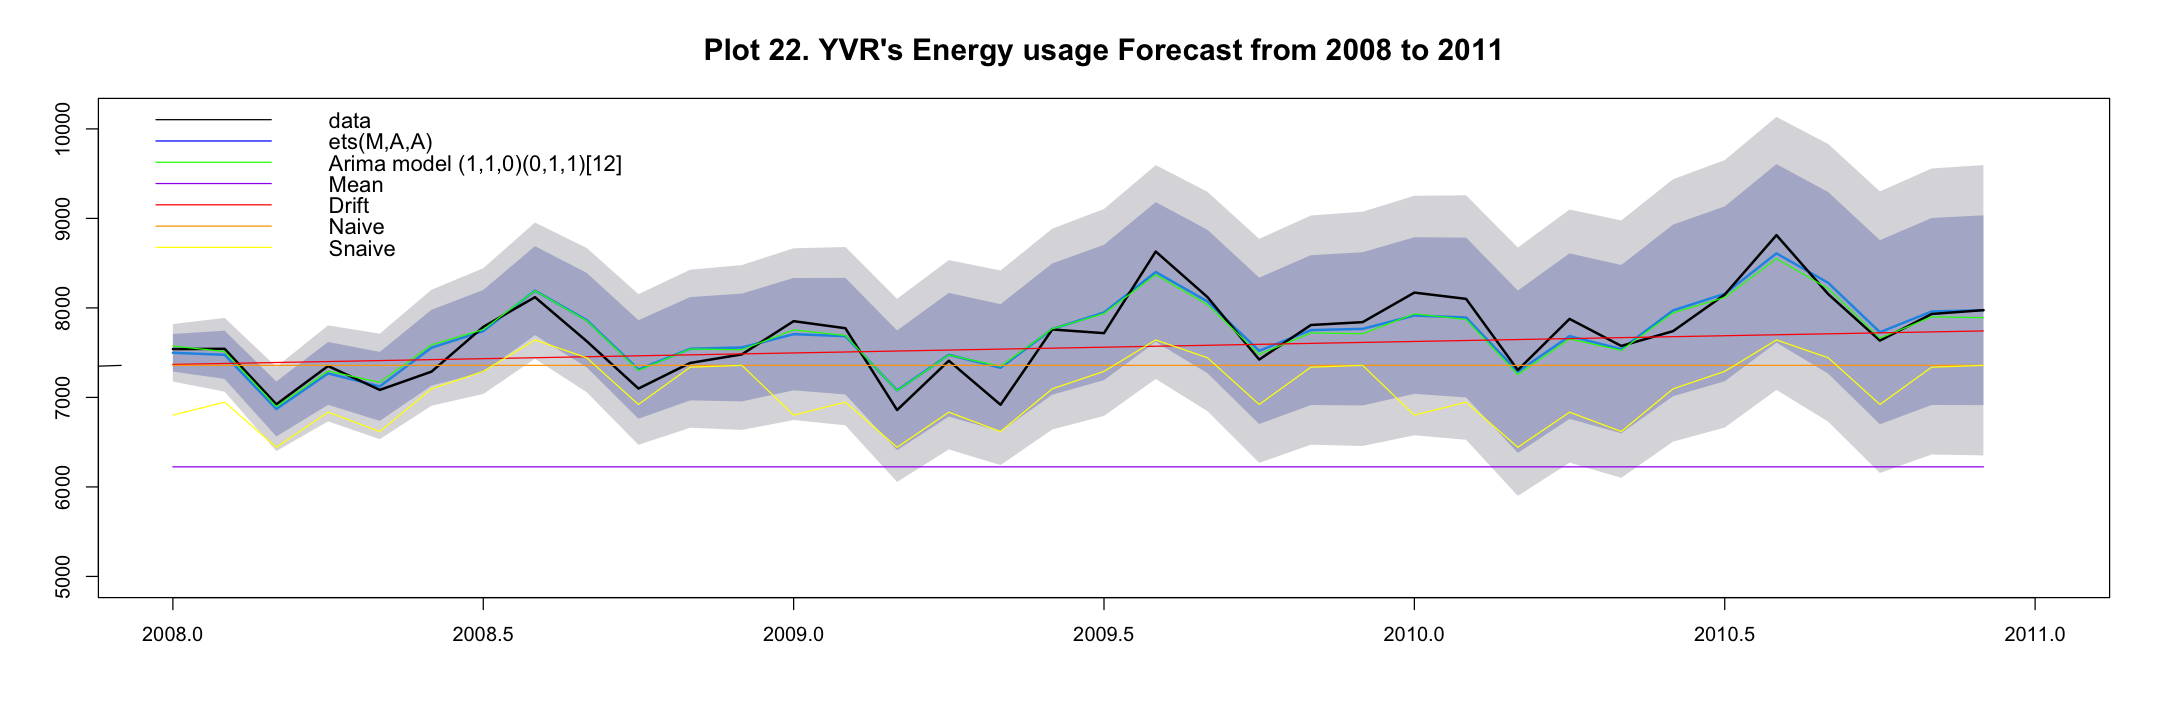

In [50]:
plot(forecast(ets_MAA, h=length(YVRdata_test)), YVRdata_test, xlim = c(2008, 2011),
    main="Plot 22. YVR's Energy usage Forecast from 2008 to 2011",
     cex.main=1.5
    )
lines(YVRdata_test, lwd=2)
lines(forecast(arima_fit4, h= length(YVRdata_test))$mean, col='green')
lines(forecast(fit_mean, h= length(YVRdata_test))$mean, col='purple')
lines(forecast(fit_drift, h= length(YVRdata_test))$mean, col='red')
lines(forecast(fit_naive, h= length(YVRdata_test))$mean, col='orange')
lines(forecast(fit_snaive, h= length(YVRdata_test))$mean, col='yellow')
legend(
    "topleft",
    lty=1, 
    col=c(1,"blue","green", "purple","red","orange","yellow"), 
    c("data", "ets(M,A,A)", "Arima model (1,1,0)(0,1,1)[12]","Mean","Drift","Naive", "Snaive"),
    cex=1.1,
    bty = "n"
) 

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

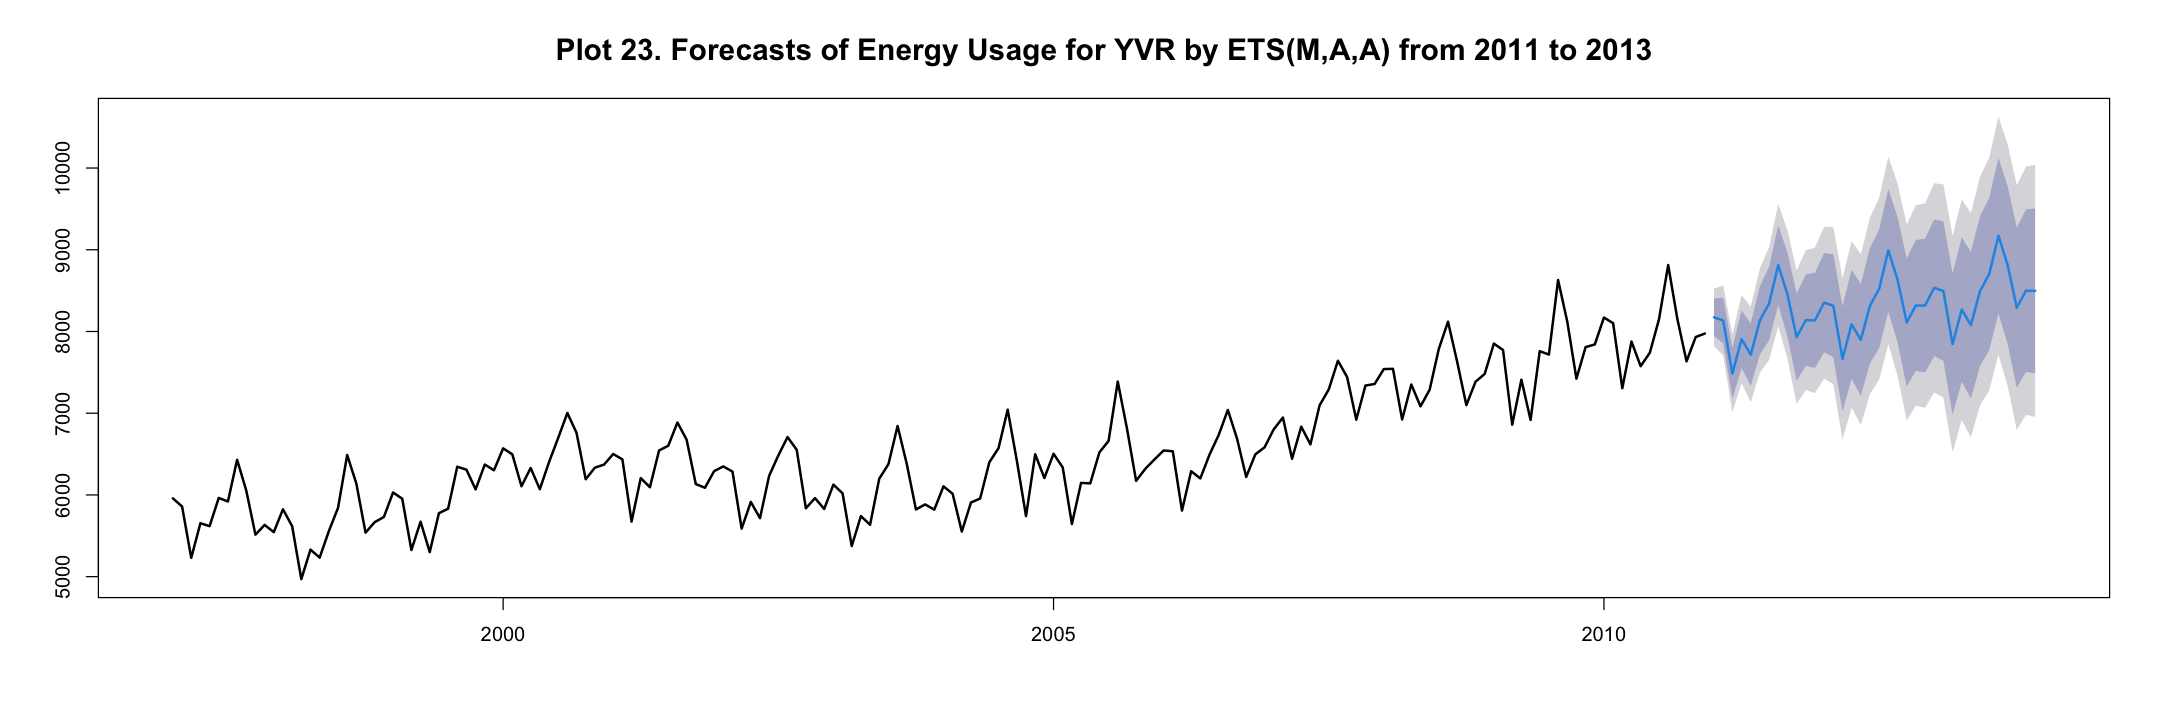

In [51]:
ets_MAA = ets(ts_YVRdata, model="MAA")
plot(forecast(ets_MAA, h=3*12), ts_YVRdata,
    main="Plot 23. Forecasts of Energy Usage for YVR by ETS(M,A,A) from 2011 to 2013",
     cex.main=1.5
    )
lines(ts_YVRdata, lwd=2)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


Exponential smoothing model is unable to handle irregular pattern such as the few outliers or spikes shown in our remainder graph from decomposition analysis. Smoothing effect would reduce the significance of abnormal observations. Our recommendation would be using other model such ARIMA model to assist with interpretation of results from ETS for a complete picture of data.

The ETS is not as effective when forecasting in long term. The trend assumption is linear and will keep increasing as time passes. Therefore, if we need to investigate the future forecasting in 25 years and more, the additive trend assumption might be unrealistic for the energy usage in YVR. The recommendation would be adding damped or try high order trend to reflect complex trend in a long-term projection.

Another limitation would be that the ETS is unable to handle complex seasonality since our final recommendation is the additive assumption for seasonality. And for EST in general, it assumes fixed and single seasonality. However, from our observation, the seasonality from temperature for energy usage shows a peak in winter and summer season. Meanwhile, the total number of passengers has a seasonality peaked in summer only. The double effect from two type of seasonality (different frequency and peaks) could lead inaccurate forecast in long run with ETS. We would recommend conducting further investigation such as explanatory analysis, capturing different impact from related variables.

<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)

Describe a possible explanatory model to try (you do not have to create this model). Explain the process required to be able to use this model to forecast.  
</div>

The first step would be selecting related variables which can explain the energy usage. From the potential cause discussion, the number of total passengers and average temperature have relationship with the seasonality of energy usage. The area of YVR airport will impact the trend of energy usage. 

We could use the three features to form a multivariate regression model respect to energy usage. The second step would be fitting an appropriate model to include the three features. We need to check on potential transformation of variables. We can use best-subset selection to choose the explanatory model since the dimension of variables is small. 

The third step would be forecasting for the three variables. The fitting procedure will be like what we performed on the energy usage with time. We need to check the residuals while fitting. There are different potential models such are ETS and ARIMA. With appropriate models, we can forecast a set of values for three variables. 

Finally, we can plug these outputs from three time series models (step three) into the explanatory model in step two to forecast a set of future value of energy usage. Use accuracy measures as per usual to assess how good these forecasts of the test set are.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

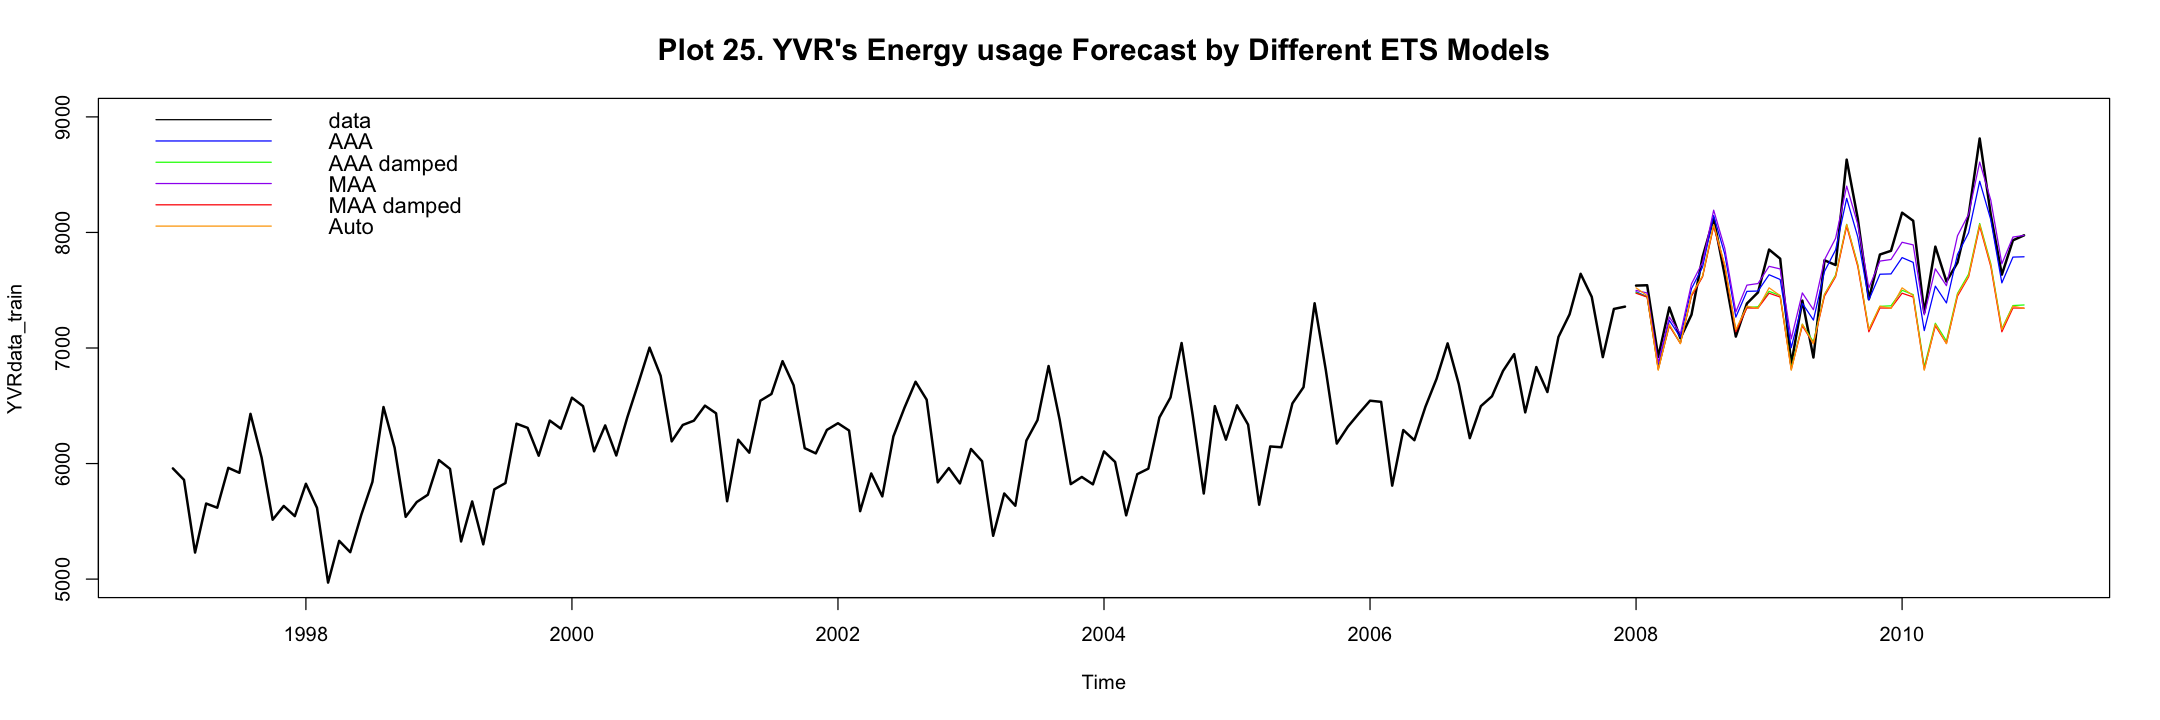

In [52]:
ets_AAA = ets(YVRdata_train, model="AAA")
ets_AAA_d = ets(YVRdata_train, model="AAA", damped = TRUE)
ets_MAA = ets(YVRdata_train, model="MAA") # final model
ets_MAA_d = ets(YVRdata_train, model="MAA", damped = TRUE)
# test_ets_AMA = ets(YVRdata_train, model="AMA") # Forbidden model conbination
# test_ets_MMA = ets(YVRdata_train, model="MMA") # Forbidden model conbination
auto_ets = ets(YVRdata_train)

plot(YVRdata_train, lwd=2, xlim = c(1997, 2011), ylim = c(5000,9000), 
    main="Plot 25. YVR's Energy usage Forecast by Different ETS Models",
    cex.main=1.5)
lines(YVRdata_test, lwd=2)
lines(forecast(ets_AAA, h= length(YVRdata_test))$mean, col='blue')
lines(forecast(ets_AAA_d, h= length(YVRdata_test))$mean, col='green')
lines(forecast(ets_MAA, h= length(YVRdata_test))$mean, col='purple')
lines(forecast(ets_MAA_d, h= length(YVRdata_test))$mean, col='red')
lines(forecast(auto_ets, h= length(YVRdata_test))$mean, col='orange')
legend(
    "topleft",
    lty=1, 
    col=c(1,"blue","green", "purple","red","orange"), 
    c("data", "AAA", "AAA damped", "MAA", "MAA damped","Auto"),
    cex=1.1,
    bty = "n"
) 

---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

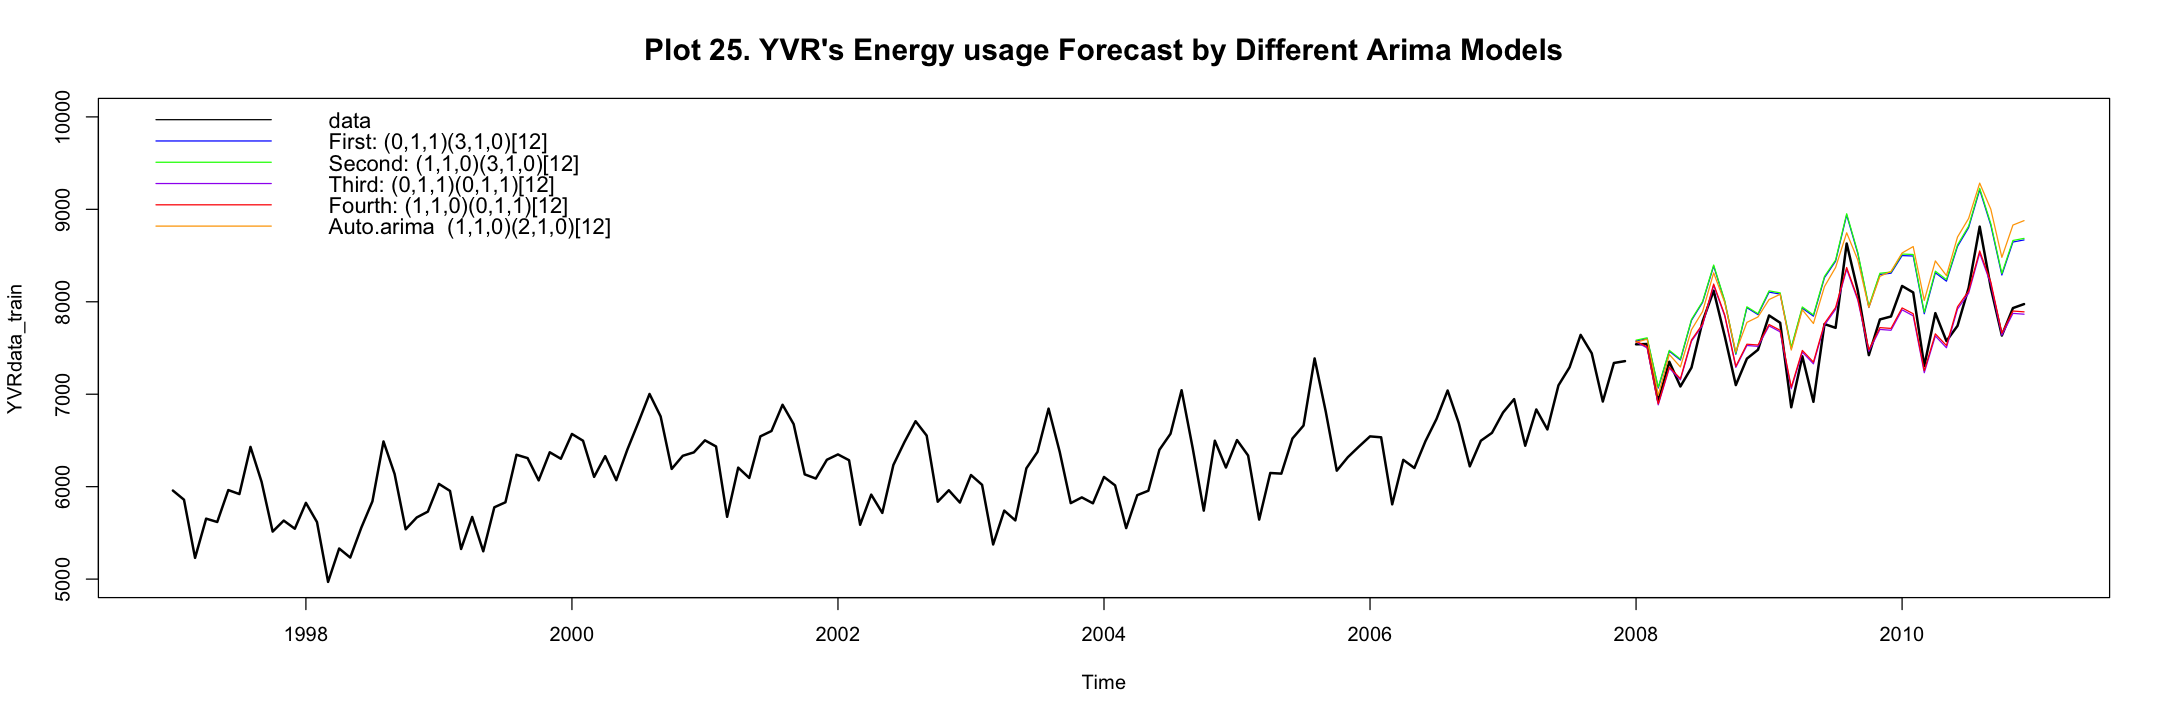

In [53]:
arima_fit1 = Arima(YVRdata_train, order = c(0,1,1), seasonal = c(3,1,0), include.constant=TRUE)
arima_fit2 = Arima(YVRdata_train, order = c(1,1,0), seasonal = c(3,1,0), include.constant=TRUE)
arima_fit3 = Arima(YVRdata_train, order = c(0,1,1), seasonal = c(0,1,1), include.constant=TRUE)
arima_fit4 = Arima(YVRdata_train, order = c(1,1,0), seasonal = c(0,1,1), include.constant=TRUE)
arima_auto = auto.arima(YVRdata_train, stepwise=FALSE, approximation=FALSE, ic="aicc")

plot(YVRdata_train, lwd=2, xlim = c(1997, 2011), ylim = c(5000,10000),
    main="Plot 25. YVR's Energy usage Forecast by Different Arima Models",
     cex.main=1.5
    )
lines(YVRdata_test, lwd=2)
lines(forecast(arima_fit1, h= length(YVRdata_test))$mean, col='blue')
lines(forecast(arima_fit2, h= length(YVRdata_test))$mean, col='green')
lines(forecast(arima_fit3, h= length(YVRdata_test))$mean, col='purple')
lines(forecast(arima_fit4, h= length(YVRdata_test))$mean, col='red')
lines(forecast(arima_auto, h= length(YVRdata_test))$mean, col='orange')
legend(
    "topleft",
    lty=1, 
    col=c(1,"blue","green", "purple","red","orange"), 
    c("data", 
     "First: (0,1,1)(3,1,0)[12]", 
    "Second: (1,1,0)(3,1,0)[12]",
    "Third: (0,1,1)(0,1,1)[12]", 
    "Fourth: (1,1,0)(0,1,1)[12]",
    "Auto.arima  (1,1,0)(2,1,0)[12]"
     ),
    cex=1.1,
    bty = "n"
) 